# Modelos: Comparativas

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH      = '..'
LIB_PATH       = f'{BASE_PATH}/lib'
DATASETS_PATH  = f'{BASE_PATH}/datasets'
METRICS_PATH   = f'{BASE_PATH}/metrics'

In [3]:
import sys
sys.path.append(LIB_PATH)

import numpy as np
import pandas as pd

import model as ml
import data.plot as pl

2023-12-11 20:59:25.736427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 20:59:26.144089: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-11 20:59:26.539395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 20:59:26.550027: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

<Figure size 640x480 with 0 Axes>

## Comparativa

In [4]:
summary = ml.ValidatorSummary.load_and_join([
    f'{METRICS_PATH}/knn', 
    f'{METRICS_PATH}/gmf', 
    f'{METRICS_PATH}/biased_gmf', 
    f'{METRICS_PATH}/nnmf', 
    f'{METRICS_PATH}/deep_fm',
    f'{METRICS_PATH}/stacking',
    f'{METRICS_PATH}/cb_user_profile',
    f'{METRICS_PATH}/fwls',
    f'{METRICS_PATH}/random',
    f'{METRICS_PATH}/bandit'
])

In [5]:
summary.show()

Ordered by mAP@5(4,5):


sample      RMSE  \
predictor                                                              
Stacking                                             249.5  1.531380   
BiasedGMF                                            249.5  0.994005   
DeepFM                                               249.5  0.920512   
FeatureWeightLinearStacking                          249.5  0.862704   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...    99.5  1.385809   
KNNItemBasedPredictor                                 99.5  1.594138   
NNMF                                                 249.5  0.921573   
K-Arm-Bandit + Thompson Sampling                     249.5  0.922202   
KNNUserBasedPredictor                                 99.5  1.601644   
GMF                                                  249.5  2.200546   
RandomPredictor                                      499.5  1.702078   
UserProfileRecommender(genres, adults, year)          49.5  1.032838   

                                                     mNDCG@5  mAP@5(4,5)  \
predictor                                                                  
Stacking                                            0.965332    0.434418   
BiasedGMF                                           0.961383    0.433127   
DeepFM                                              0.958641    0.432331   
FeatureWeightLinearStacking                         0.964284    0.432087   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...  0.956877    0.430173   
KNNItemBasedPredictor                               0.953267    0.428817   
NNMF                                                0.958034    0.425299   
K-Arm-Bandit + Thompson Sampling                    0.964274    0.420789   
KNNUserBasedPredictor                               0.957770    0.415362   
GMF                                                 0.954143    0.396944   
RandomPredictor                                     0.951821    0.384079   
UserProfileRecommender(genres, adults, year)        0.957981    0.366472   

                                                    MeanUserF1.0Score@5(4,5)  \
predictor                                                                      
Stacking                                                            0.672879   
BiasedGMF                                                           0.663120   
DeepFM                                                              0.663434   
FeatureWeightLinearStacking                                         0.666237   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...                  0.644610   
KNNItemBasedPredictor                                               0.642452   
NNMF                                                                0.644337   
K-Arm-Bandit + Thompson Sampling                                    0.660409   
KNNUserBasedPredictor                                               0.595985   
GMF                                                                 0.511775   
RandomPredictor                                                     0.517523   
UserProfileRecommender(genres, adults, year)                        0.614142   

                                                    Precision@5(4,5)  \
predictor                                                              
Stacking                                                    0.672813   
BiasedGMF                                                   0.662751   
DeepFM                                                      0.661825   
FeatureWeightLinearStacking                                 0.666877   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...          0.646796   
KNNItemBasedPredictor                                       0.641930   
NNMF                                                        0.644576   
K-Arm-Bandit + Thompson Sampling                            0.658889   
KNNUserBasedPredictor                                       0.596644   
GMF                                                         0.512

In [6]:
summary.show(['mNDCG@5'], ['mNDCG@5'])

Ordered by mNDCG@5:


mNDCG@5
predictor                                                   
Stacking                                            0.965332
FeatureWeightLinearStacking                         0.964284
K-Arm-Bandit + Thompson Sampling                    0.964274
BiasedGMF                                           0.961383
DeepFM                                              0.958641
NNMF                                                0.958034
UserProfileRecommender(genres, adults, year)        0.957981
KNNUserBasedPredictor                               0.957770
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...  0.956877
GMF                                                 0.954143
KNNItemBasedPredictor                               0.953267
RandomPredictor                                     0.951821

In [7]:
summary.show(['RMSE'], ['RMSE'], ascending=True)

Ordered by RMSE:


RMSE
predictor                                                   
FeatureWeightLinearStacking                         0.862704
DeepFM                                              0.920512
NNMF                                                0.921573
K-Arm-Bandit + Thompson Sampling                    0.922202
BiasedGMF                                           0.994005
UserProfileRecommender(genres, adults, year)        1.032838
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...  1.385809
Stacking                                            1.531380
KNNItemBasedPredictor                               1.594138
KNNUserBasedPredictor                               1.601644
RandomPredictor                                     1.702078
GMF                                                 2.200546

In [8]:
summary.show(['MeanUserF1.0Score@5(4,5)'], ['MeanUserF1.0Score@5(4,5)'])

Ordered by MeanUserF1.0Score@5(4,5):


MeanUserF1.0Score@5(4,5)
predictor                                                                   
Stacking                                                            0.672879
FeatureWeightLinearStacking                                         0.666237
DeepFM                                                              0.663434
BiasedGMF                                                           0.663120
K-Arm-Bandit + Thompson Sampling                                    0.660409
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...                  0.644610
NNMF                                                                0.644337
KNNItemBasedPredictor                                               0.642452
UserProfileRecommender(genres, adults, year)                        0.614142
KNNUserBasedPredictor                                               0.595985
RandomPredictor                                                     0.517523
GMF                                                                 0.511775

In [9]:
from IPython.display import Latex
Latex(summary.to_latex())

Ordered by mAP@5(4,5):


<IPython.core.display.Latex object>

In [10]:
data = summary.data
data

predictor  sample      RMSE   mNDCG@5  \
0                 KNNUserBasedPredictor       0  1.683932  0.947387   
1                 KNNUserBasedPredictor       0  1.683932  0.947387   
2                 KNNUserBasedPredictor       0  1.683932  0.947387   
3                 KNNUserBasedPredictor       0  1.683932  0.947387   
4                 KNNUserBasedPredictor       0  1.683932  0.947387   
...                                 ...     ...       ...       ...   
38395  K-Arm-Bandit + Thompson Sampling     499  0.933180  0.964817   
38396  K-Arm-Bandit + Thompson Sampling     499  0.933180  0.964817   
38397  K-Arm-Bandit + Thompson Sampling     499  0.933180  0.964817   
38398  K-Arm-Bandit + Thompson Sampling     499  0.933180  0.964817   
38399  K-Arm-Bandit + Thompson Sampling     499  0.933180  0.964817   

       mNDCG@5 users found  mAP@5(4,5)  mAP@5(4,5) users found  \
0                       59    0.415942                      59   
1                       59    0.415942                      59   
2                       59    0.415942                      59   
3                       59    0.415942                      59   
4                       59    0.415942                      59   
...                    ...         ...                     ...   
38395                  222    0.399011                     222   
38396                  222    0.399011                     222   
38397                  222    0.399011                     222   
38398                  222    0.399011                     222   
38399                  222    0.399011                     222   

       MeanUserF1.0Score@5(4,5)  MeanUserF1.0Score@5(4,5) users found  \
0                      0.579661                                    59   
1                      0.579661                                    59   
2                      0.579661                                    59   
3                      0.579661                                    59   
4                      0.579661                                    59   
...                         ...                                   ...   
38395                  0.654054                                   222   
38396                  0.654054                                   222   
38397                  0.654054                                   222   
38398                  0.654054                                   222   
38399                  0.654054                                   222   

       Precision@5(4,5)  Precision@5(4,5) users found  Recall@5(4,5)  \
0              0.538983                            59       0.518644   
1              0.538983                            59       0.518644   
2              0.538983                            59       0.518644   
3              0.538983                            59       0.518644   
4              0.538983                            59       0.518644   
...                 ...                           ...            ...   
38395          0.681081                           222       0.649550   
38396          0.681081                           222       0.649550   
38397          0.681081                           222       0.649550   
38398          0.681081                           222       0.649550   
38399          0.681081                           222       0.649550   

       Recall@5(4,5) users found  
0                             59  
1                             59  
2                             59  
3                             59  
4                             59  
...                          ...  
38395                        222  
38396                        222  
38397                        222  
38398                        222  
38399                        222  

[38400 rows x 13 columns]

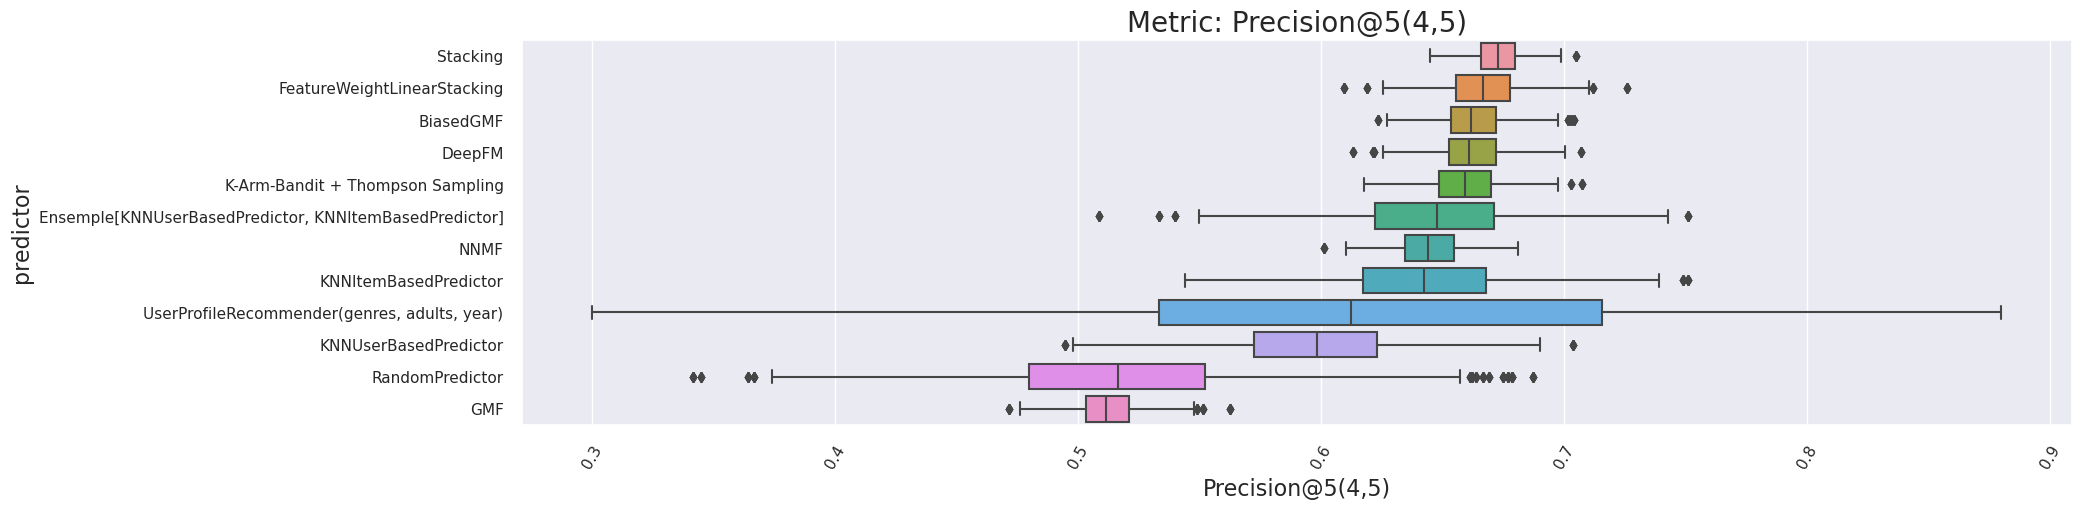

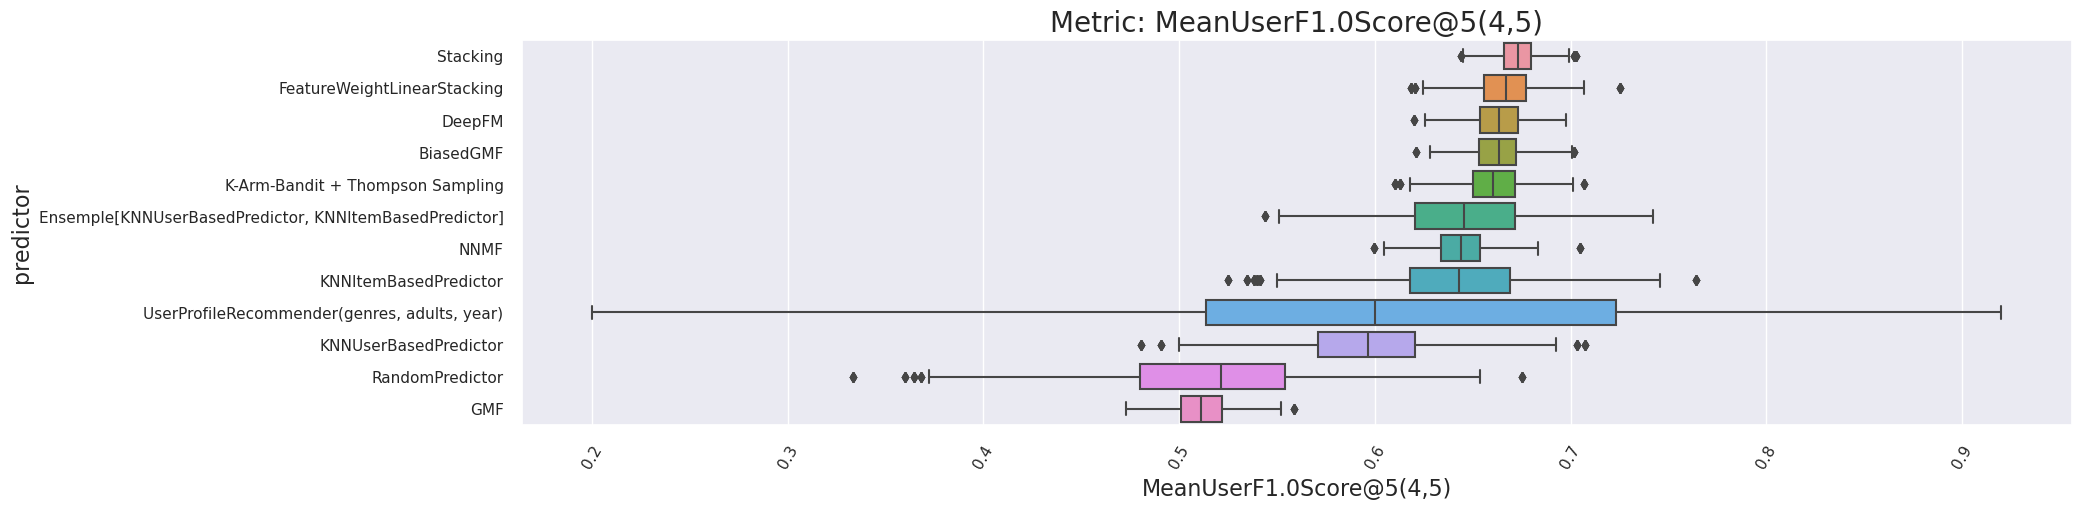

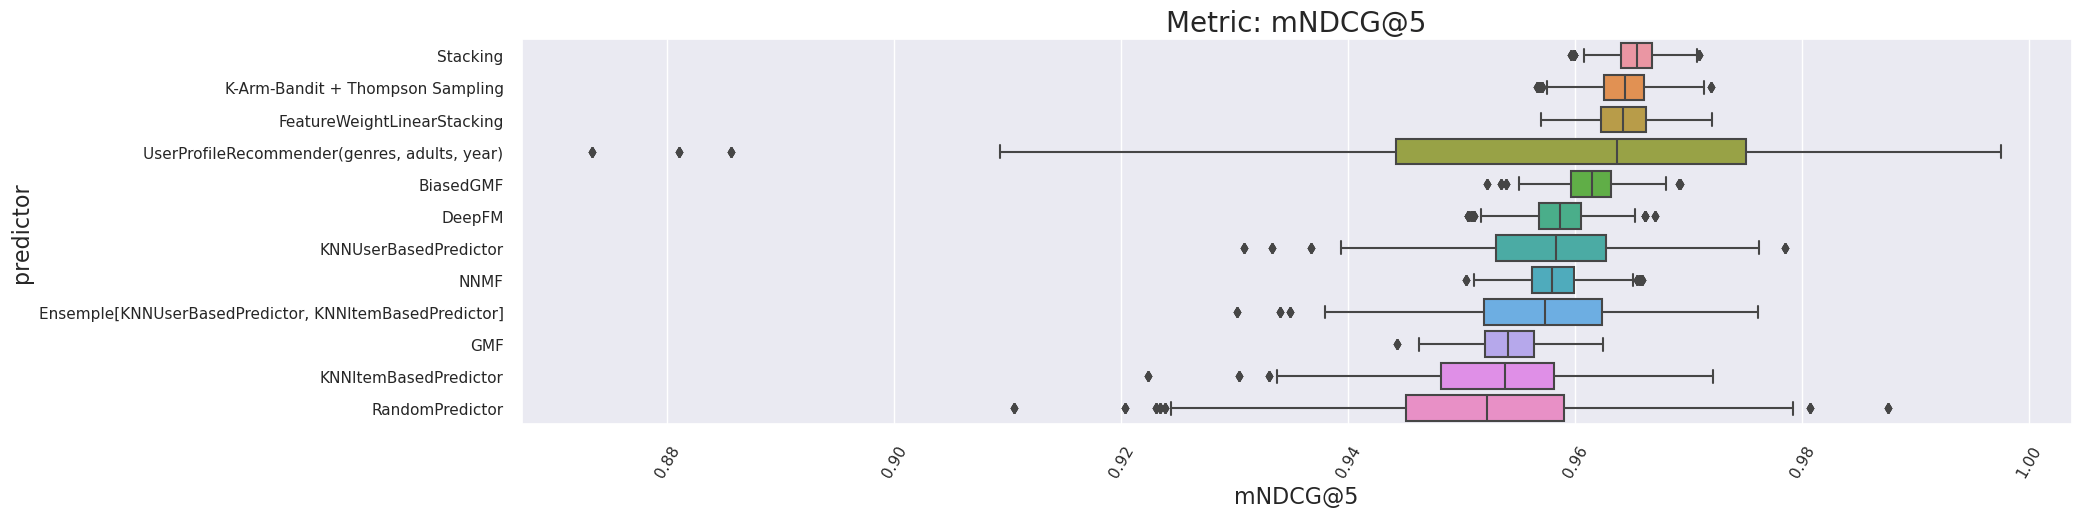

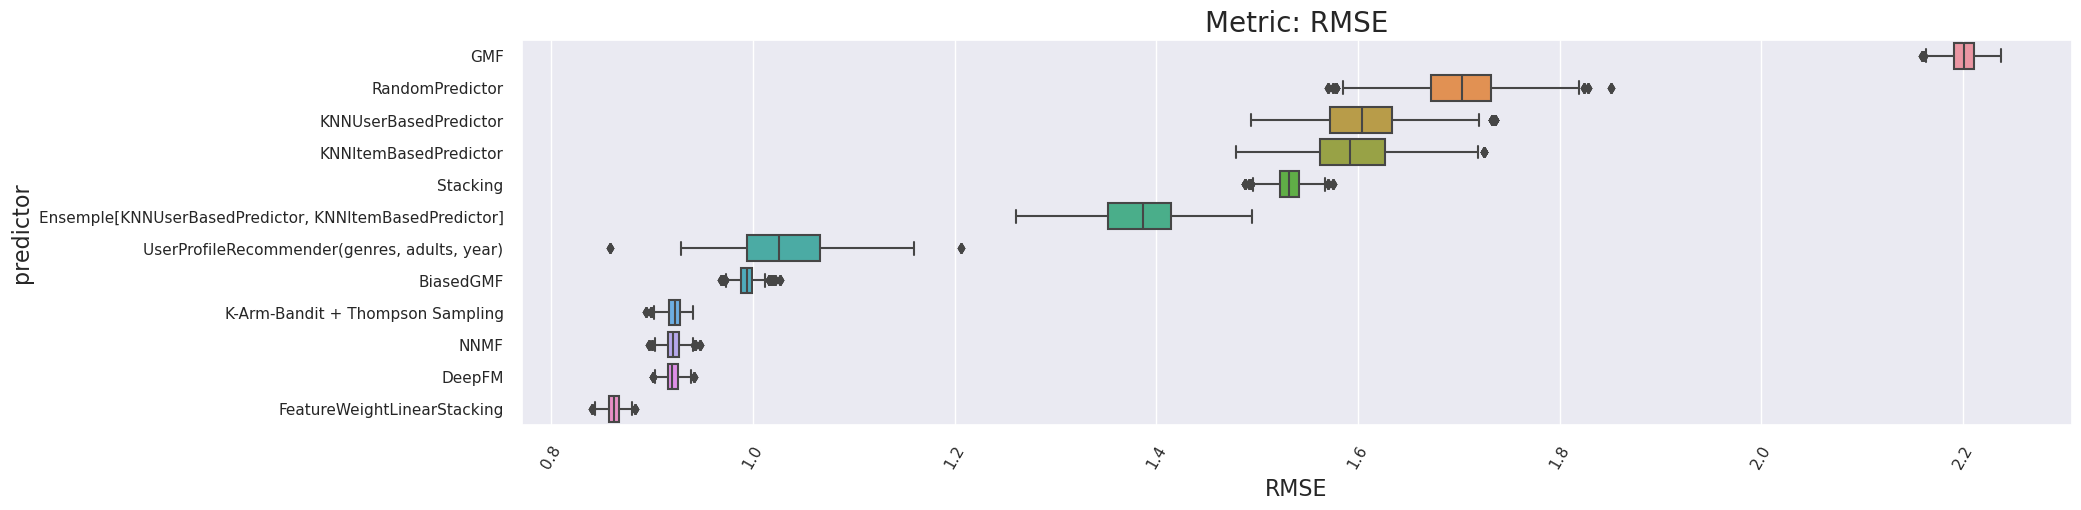

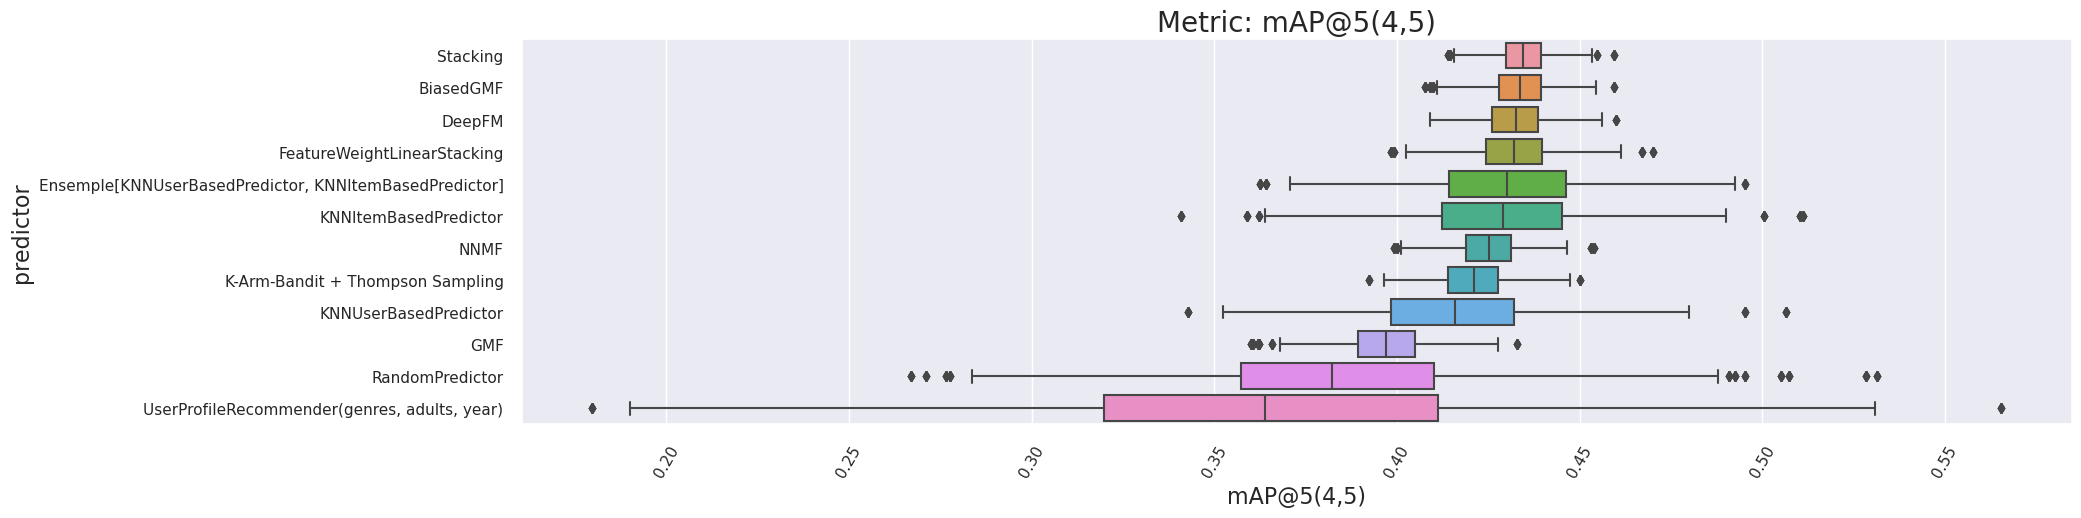

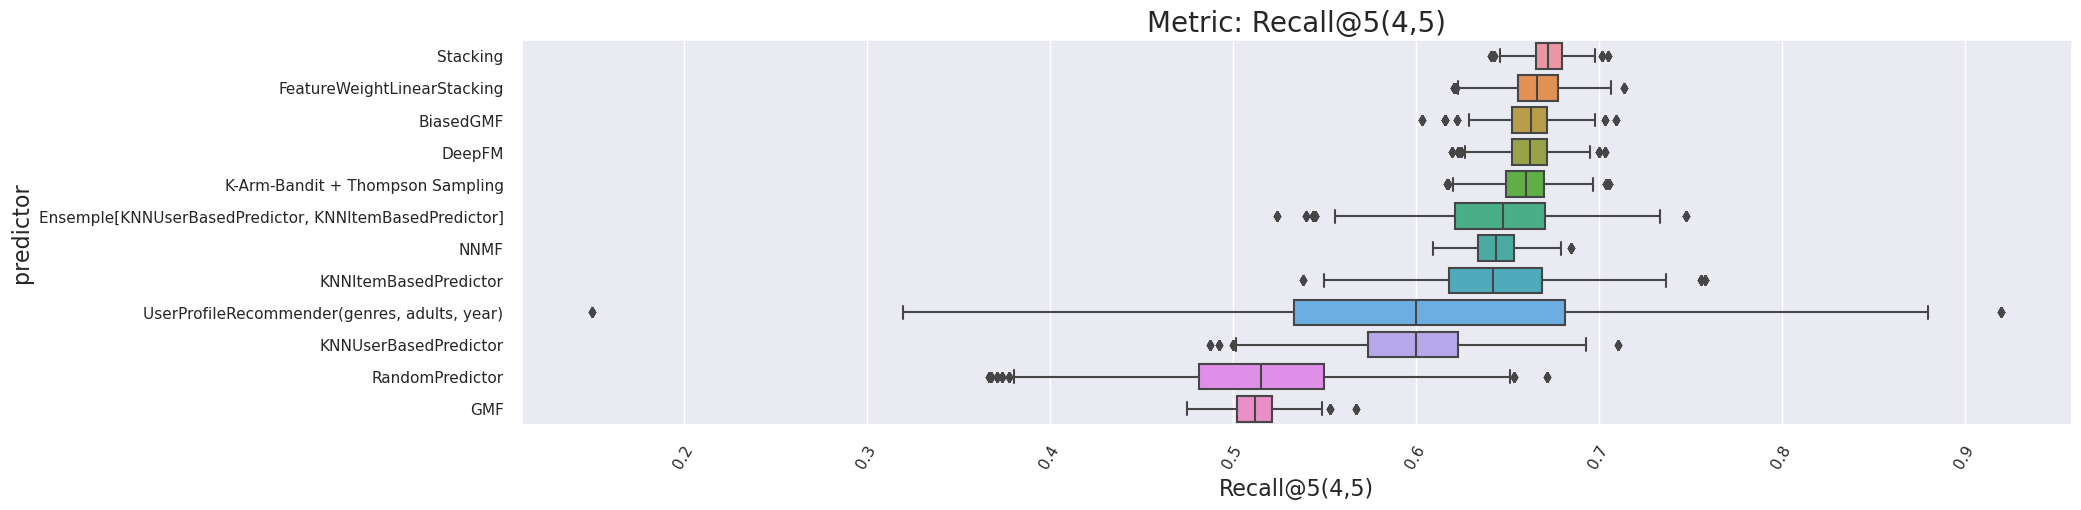

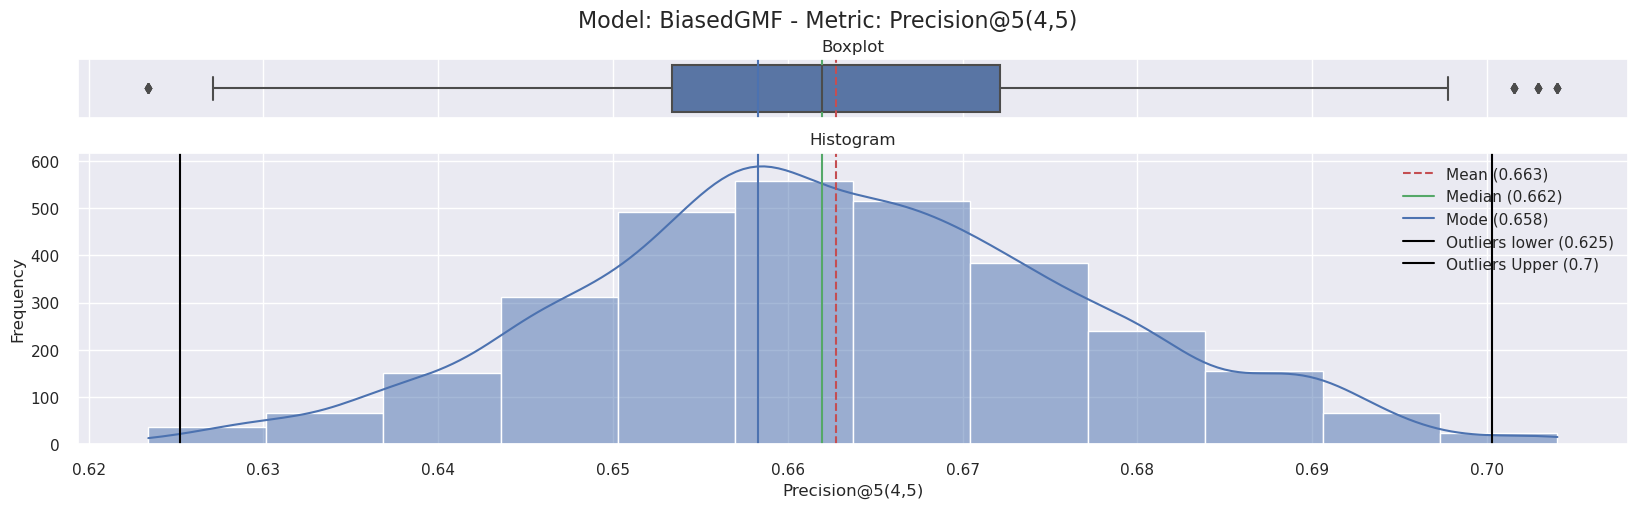

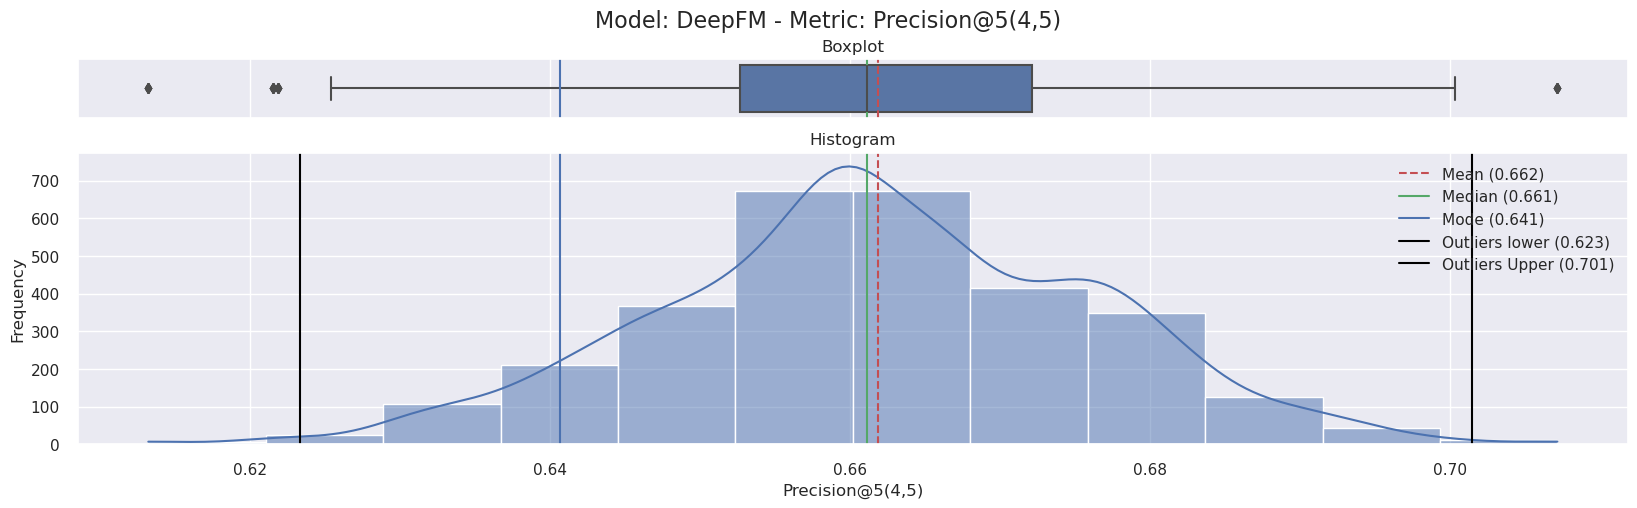

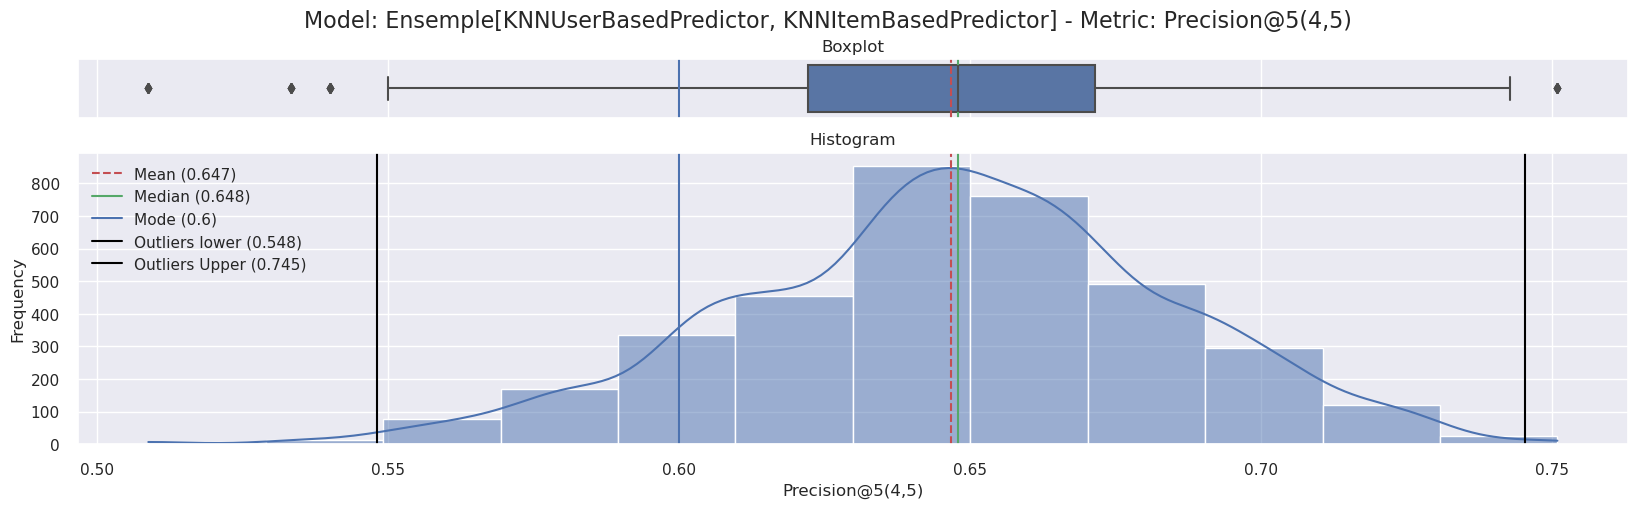

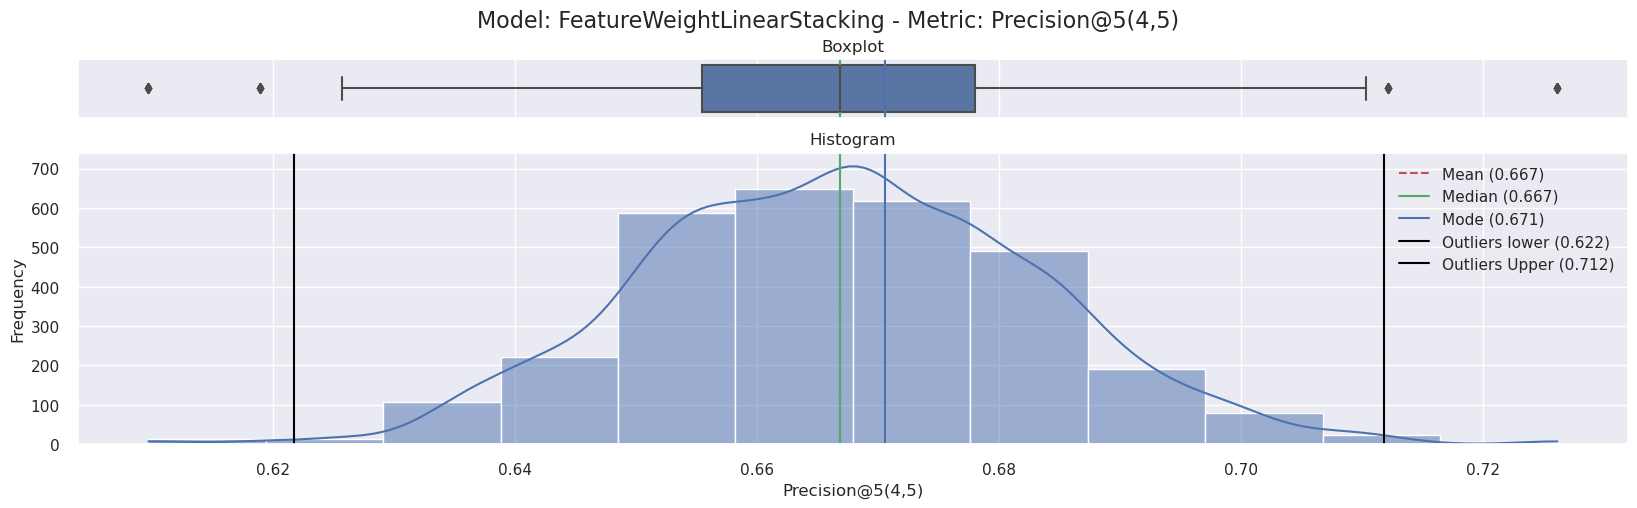

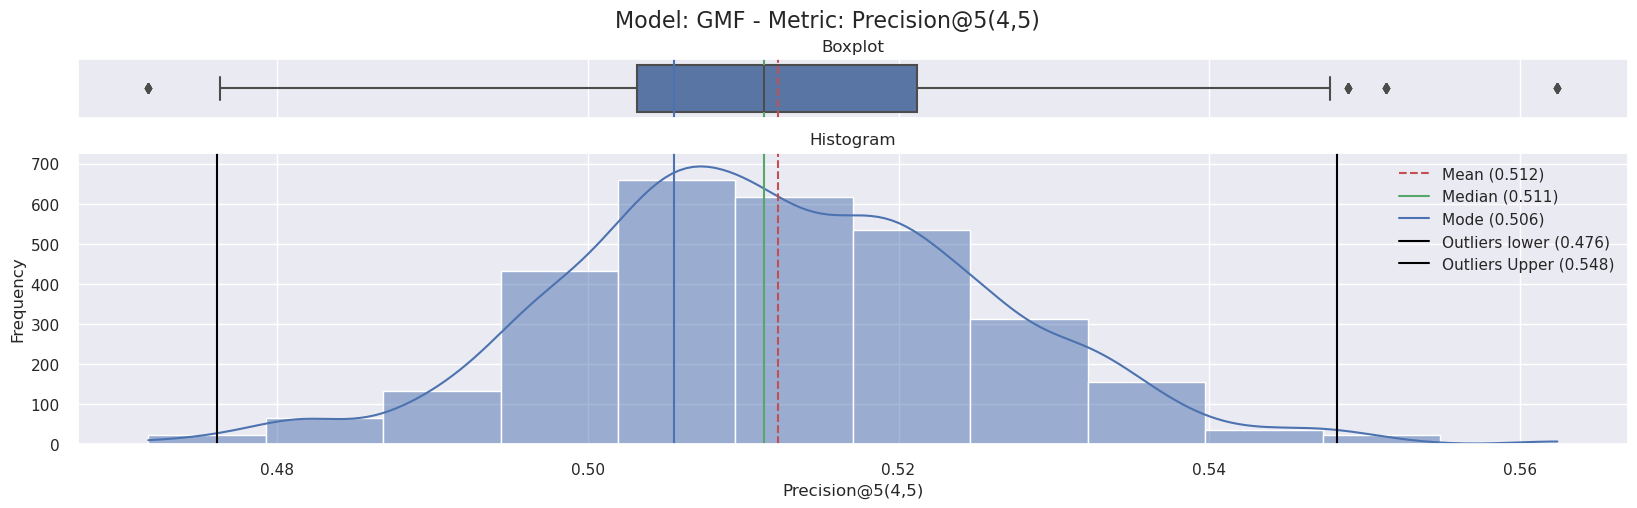

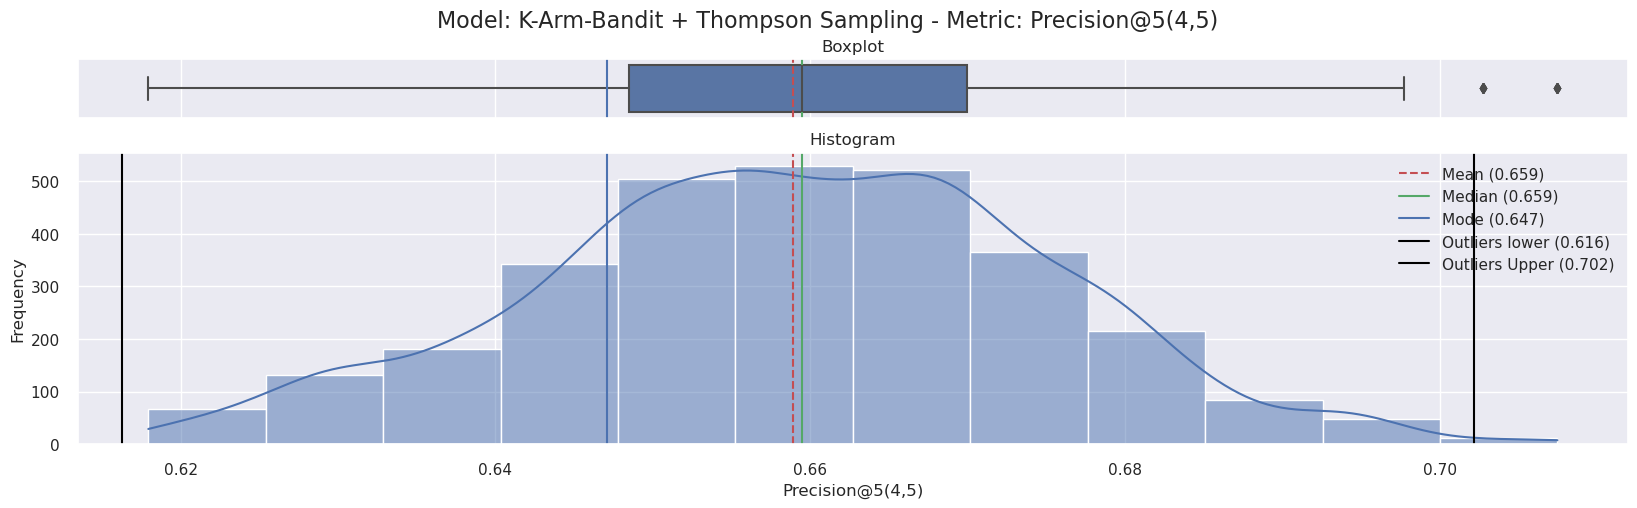

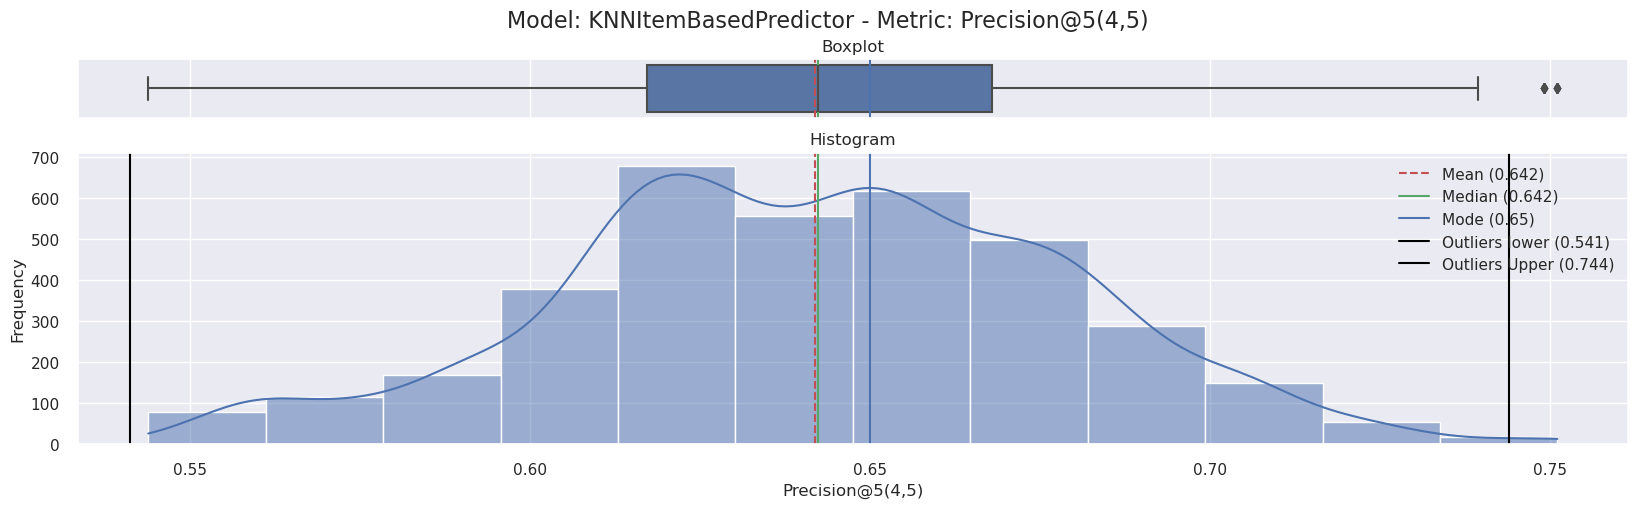

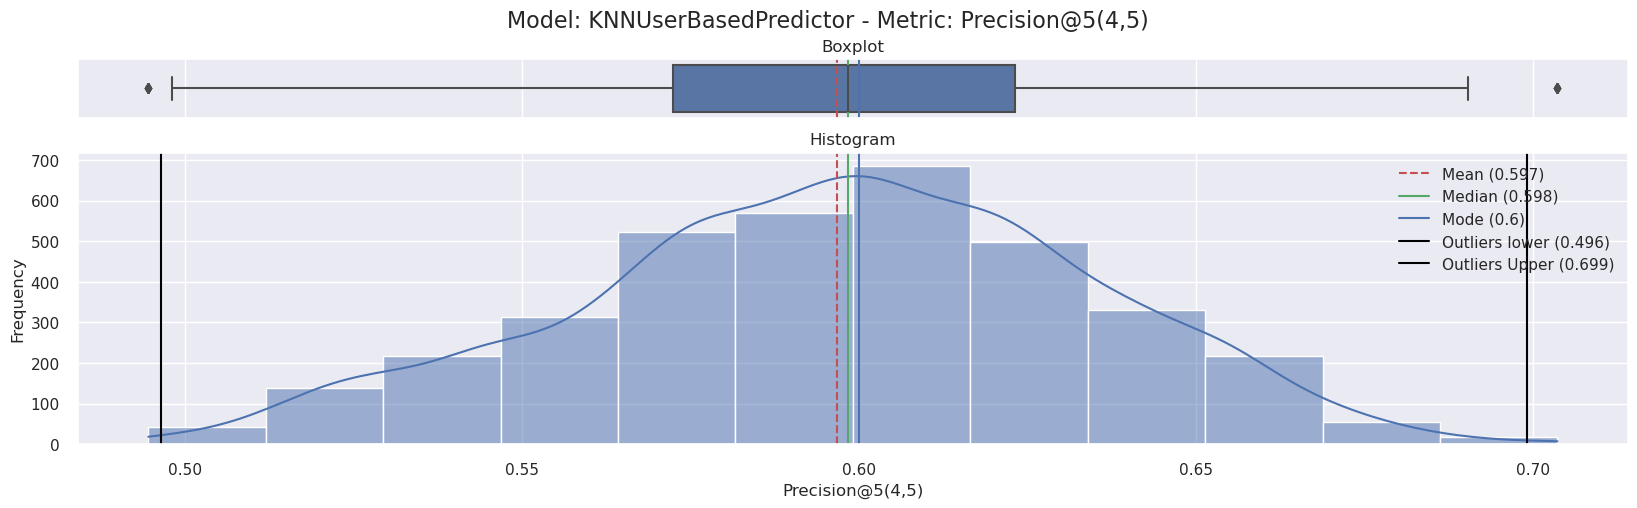

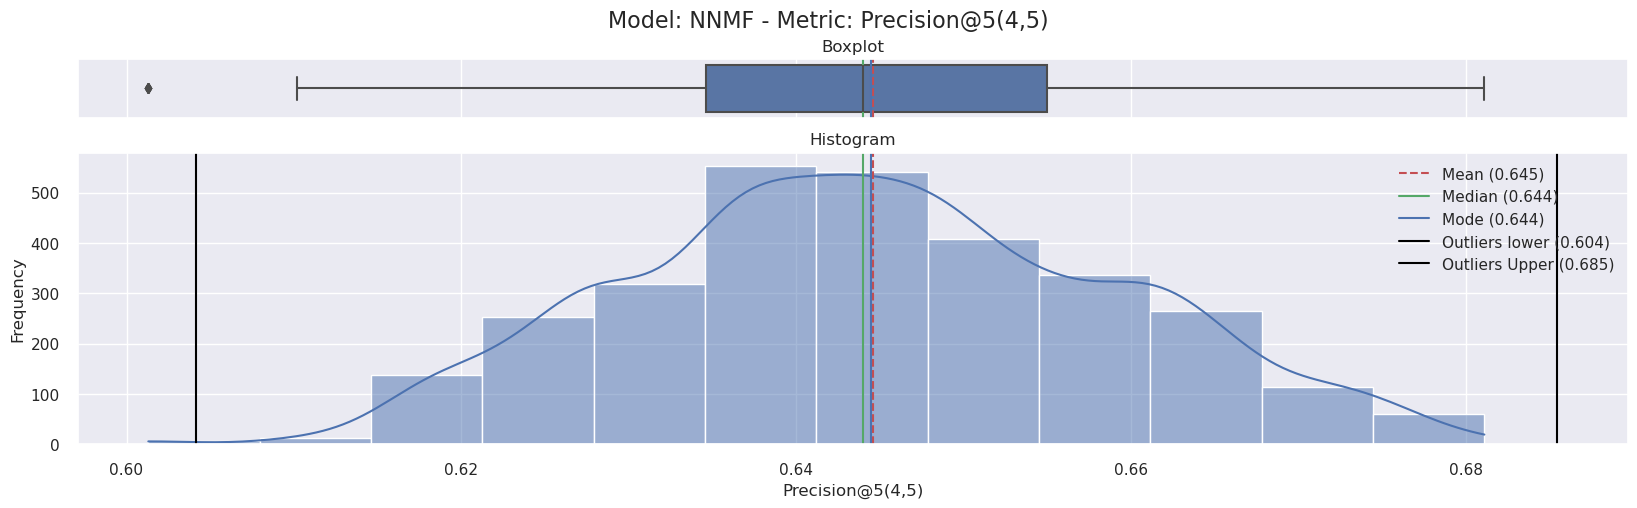

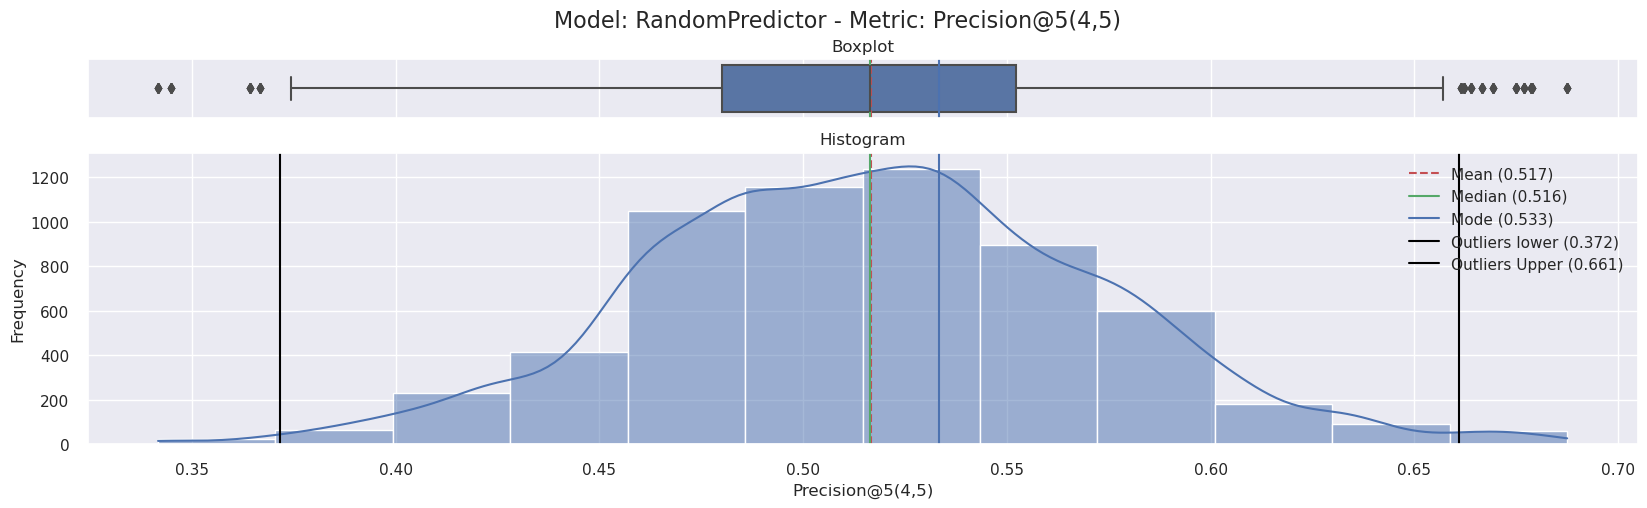

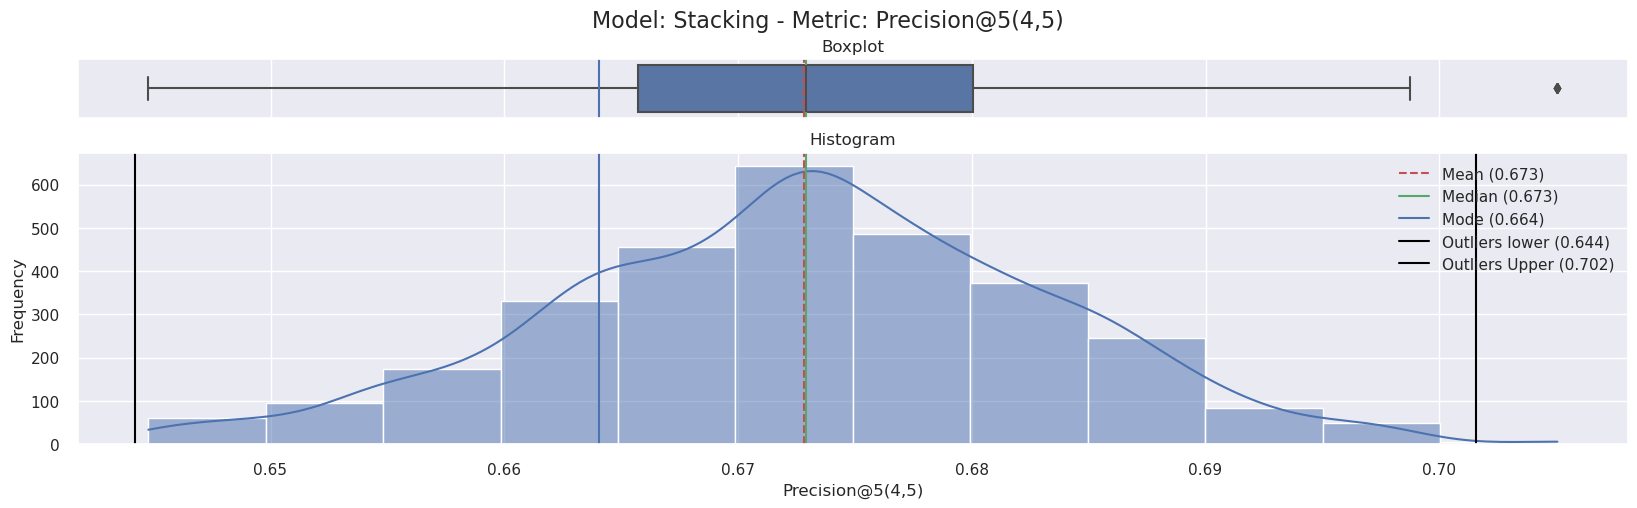

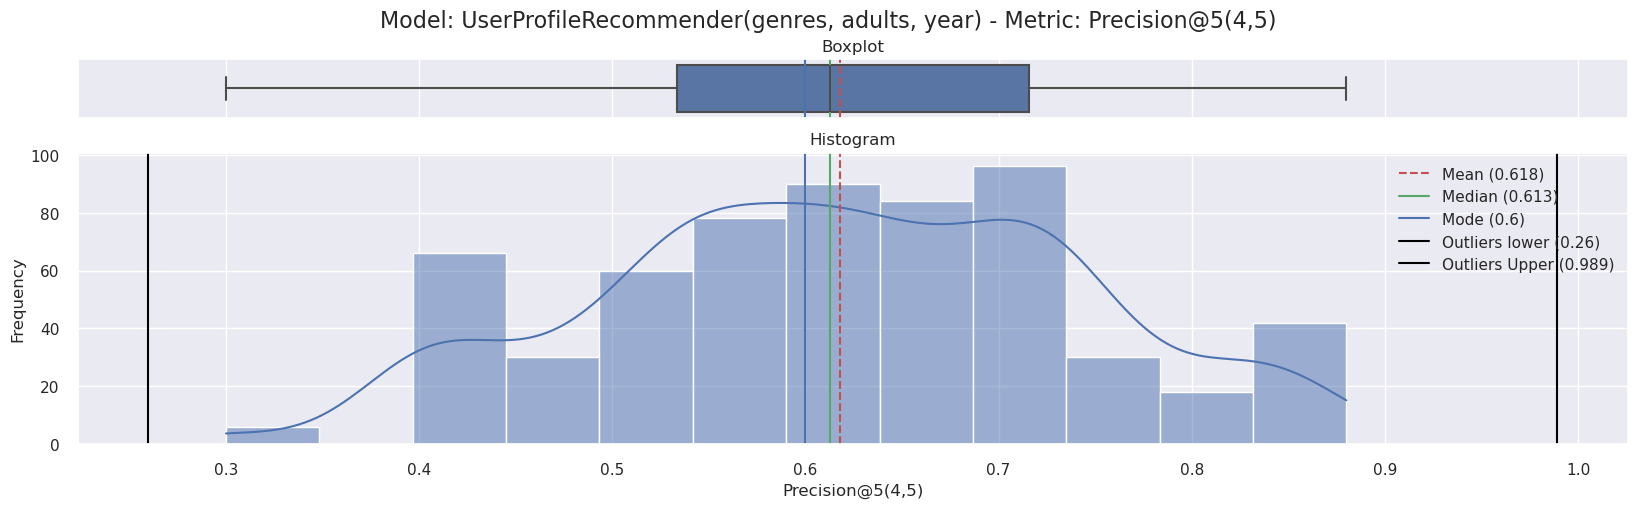

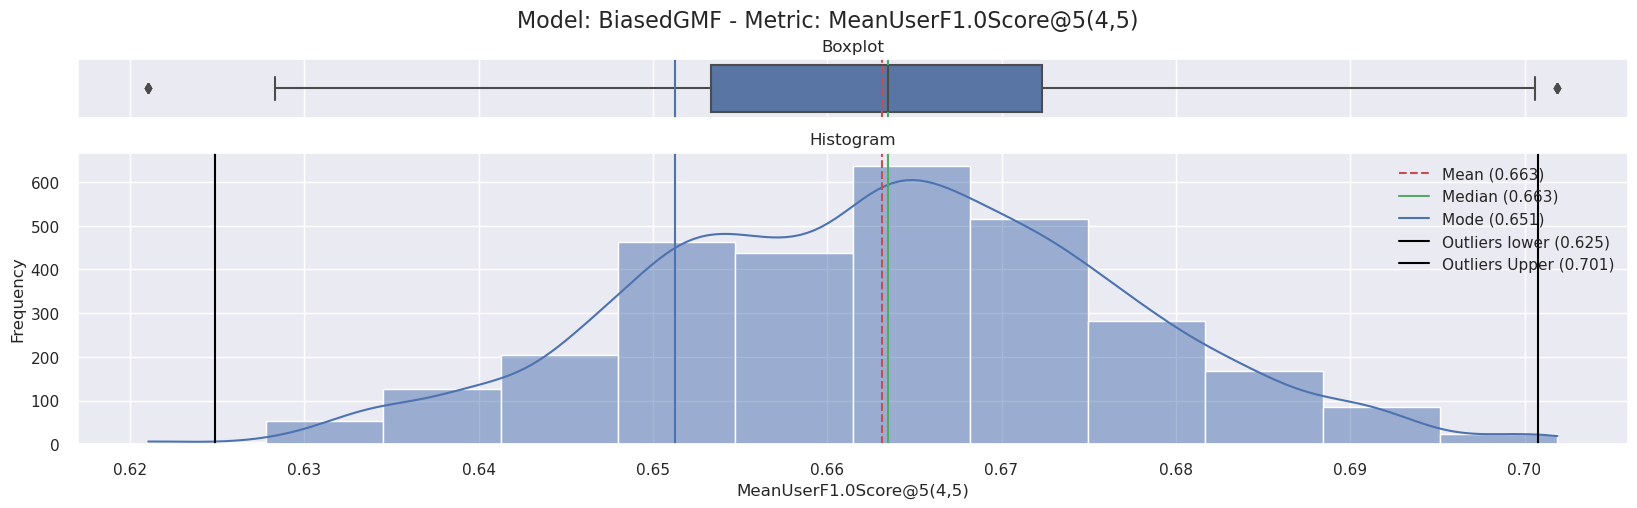

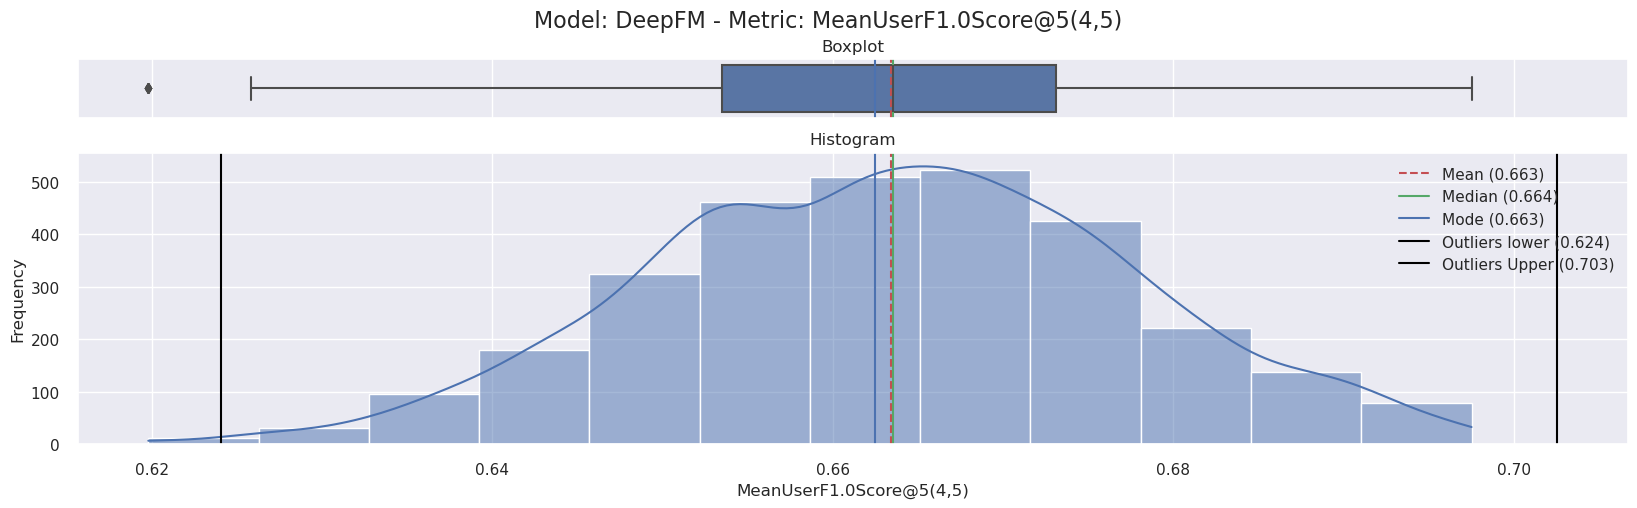

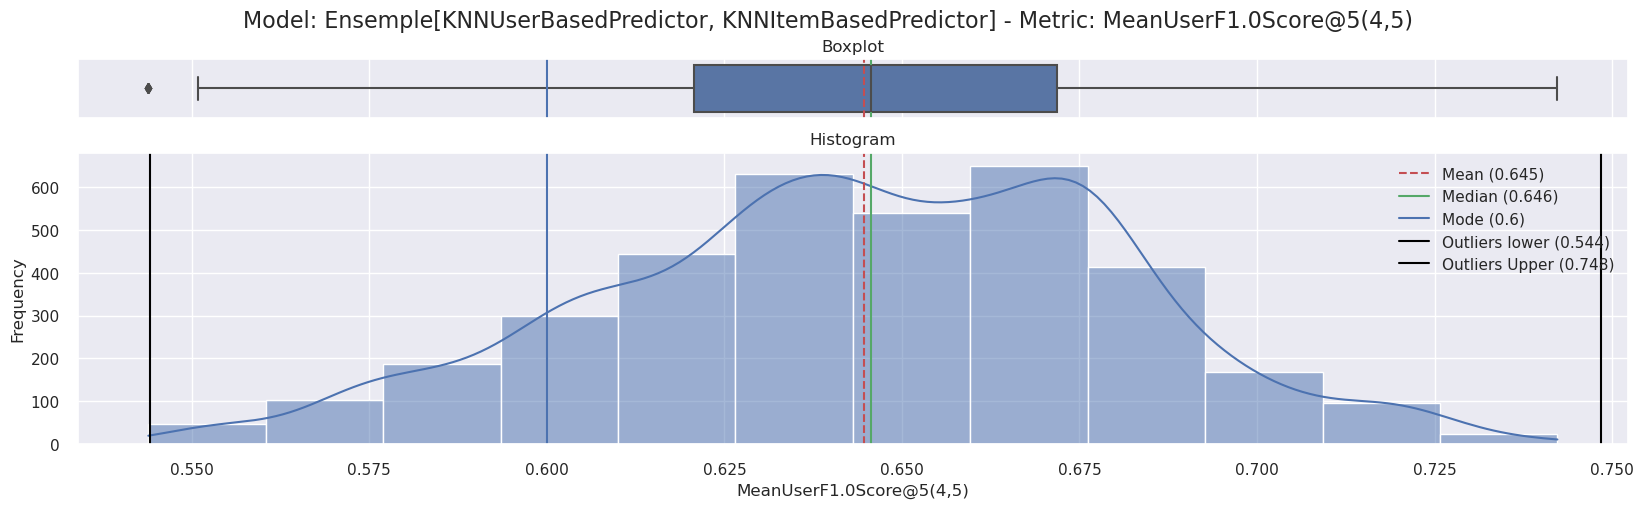

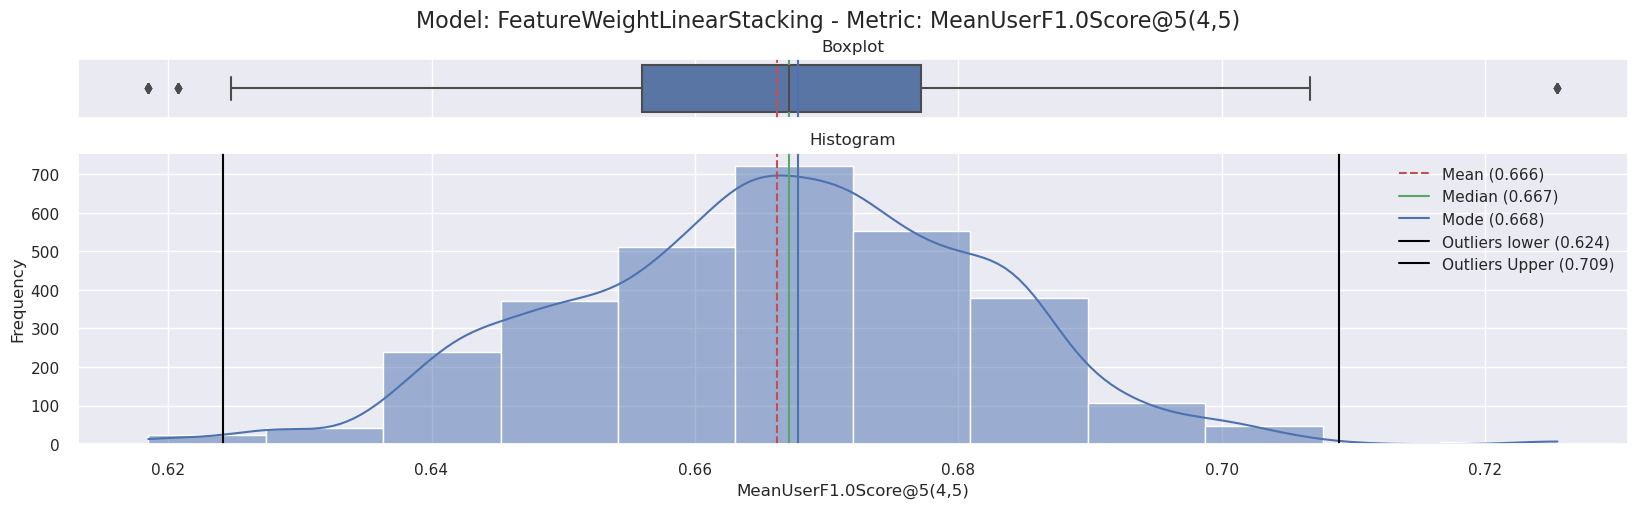

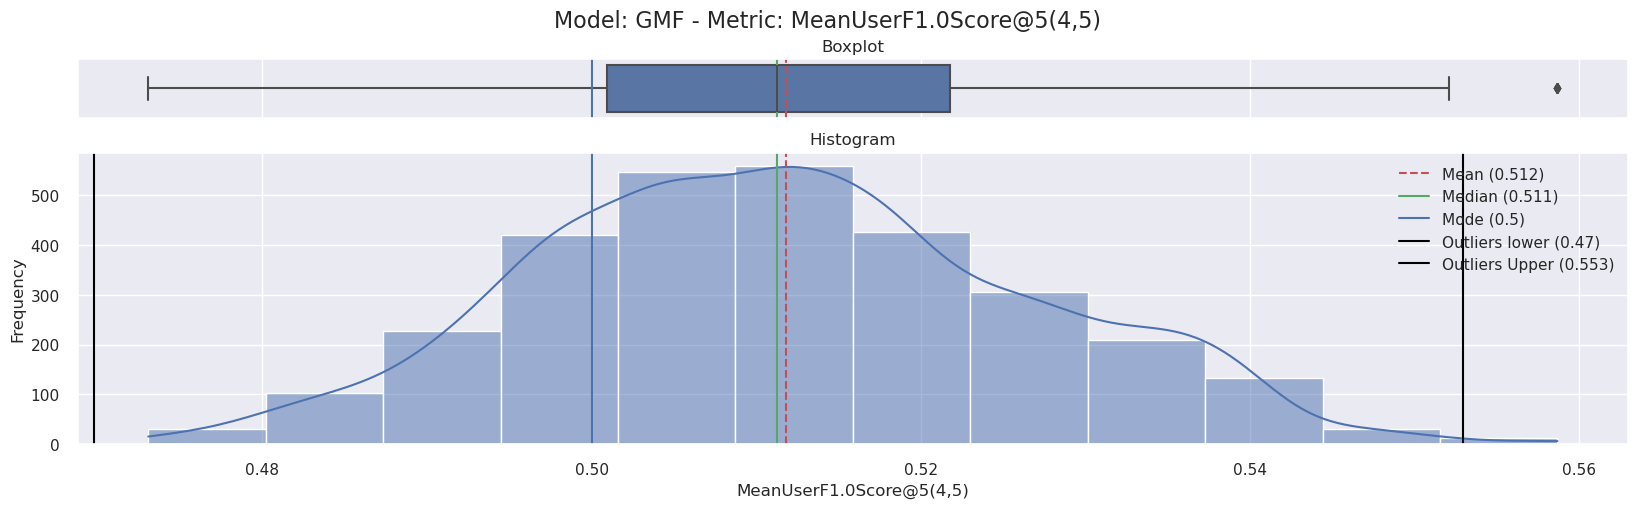

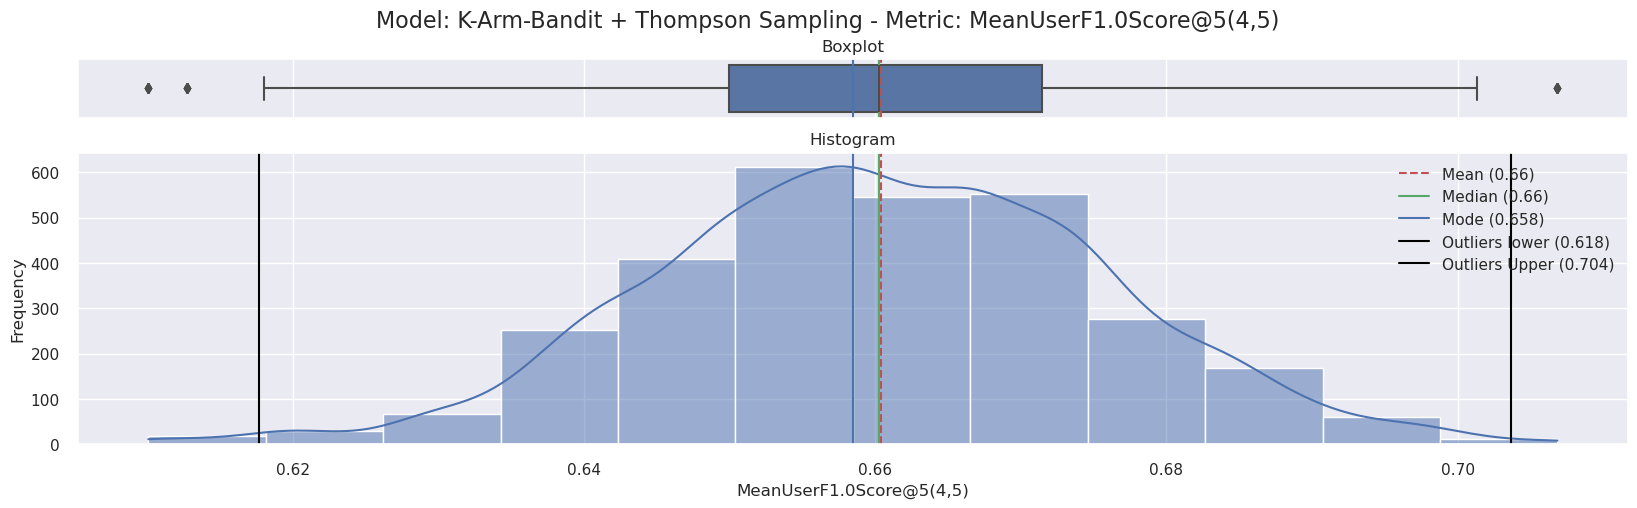

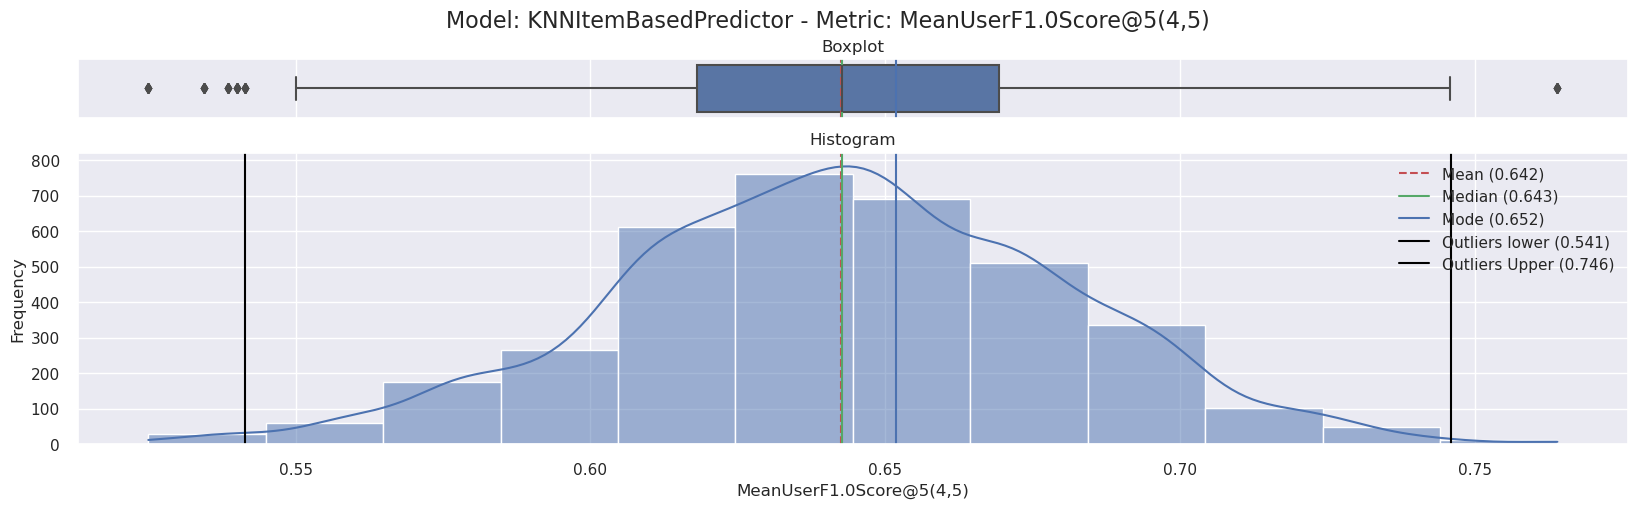

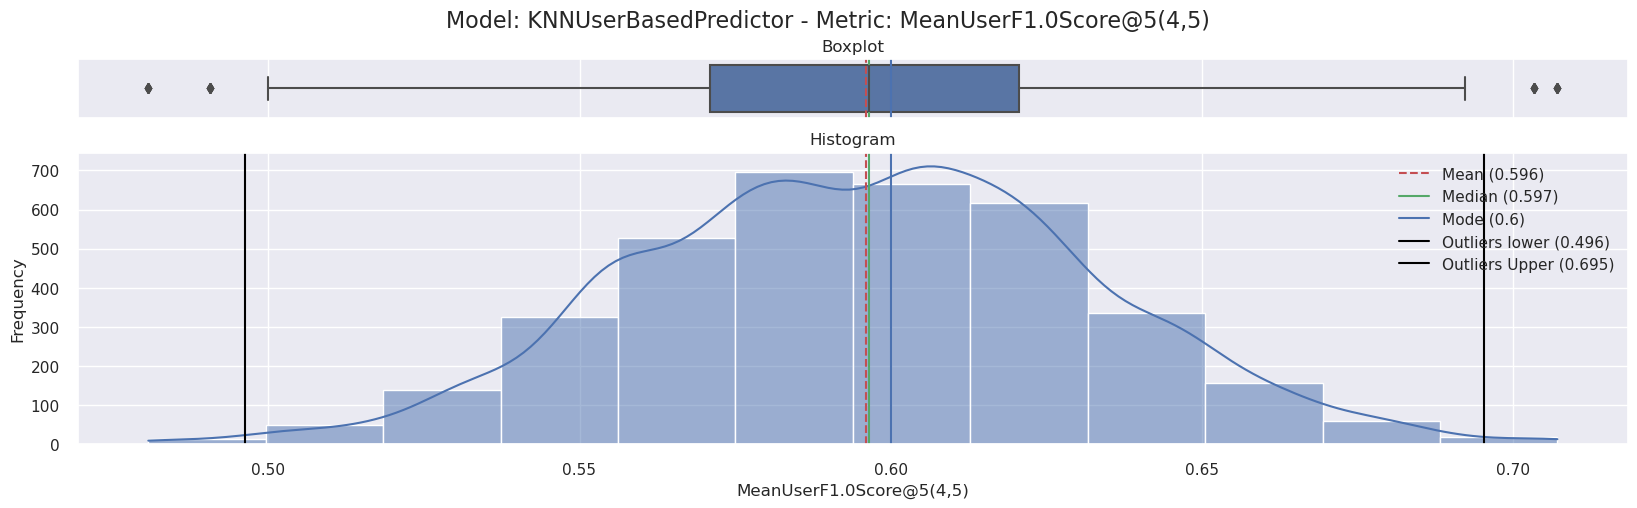

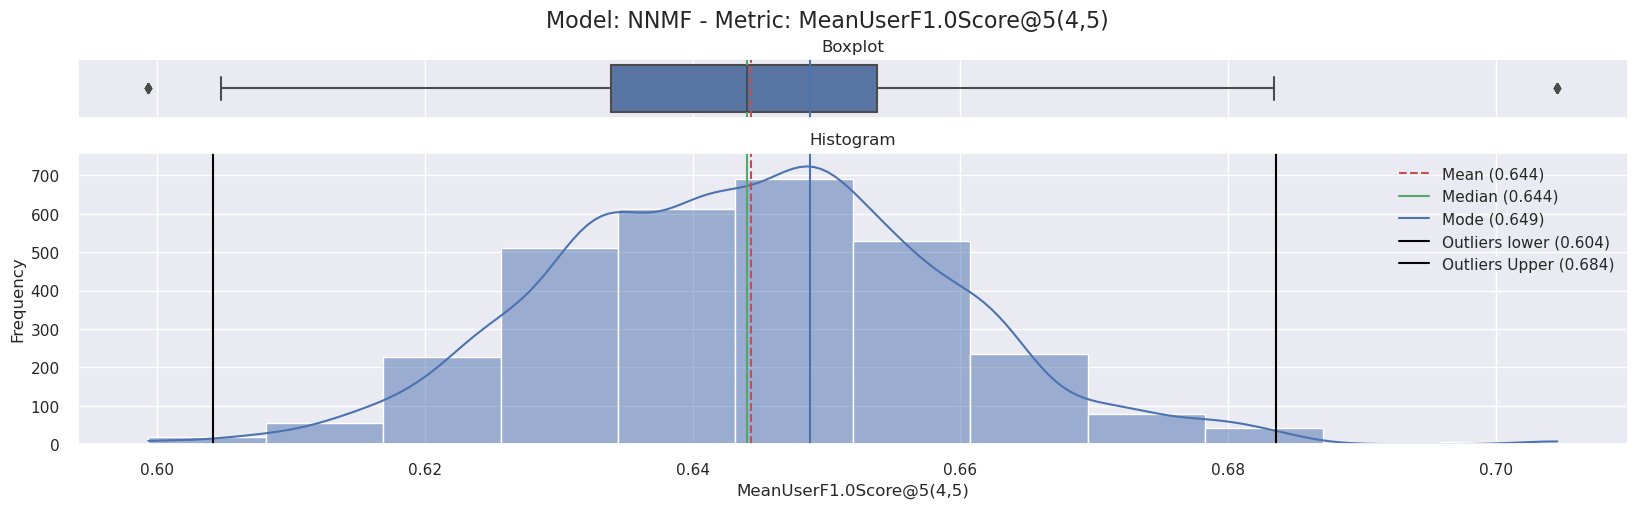

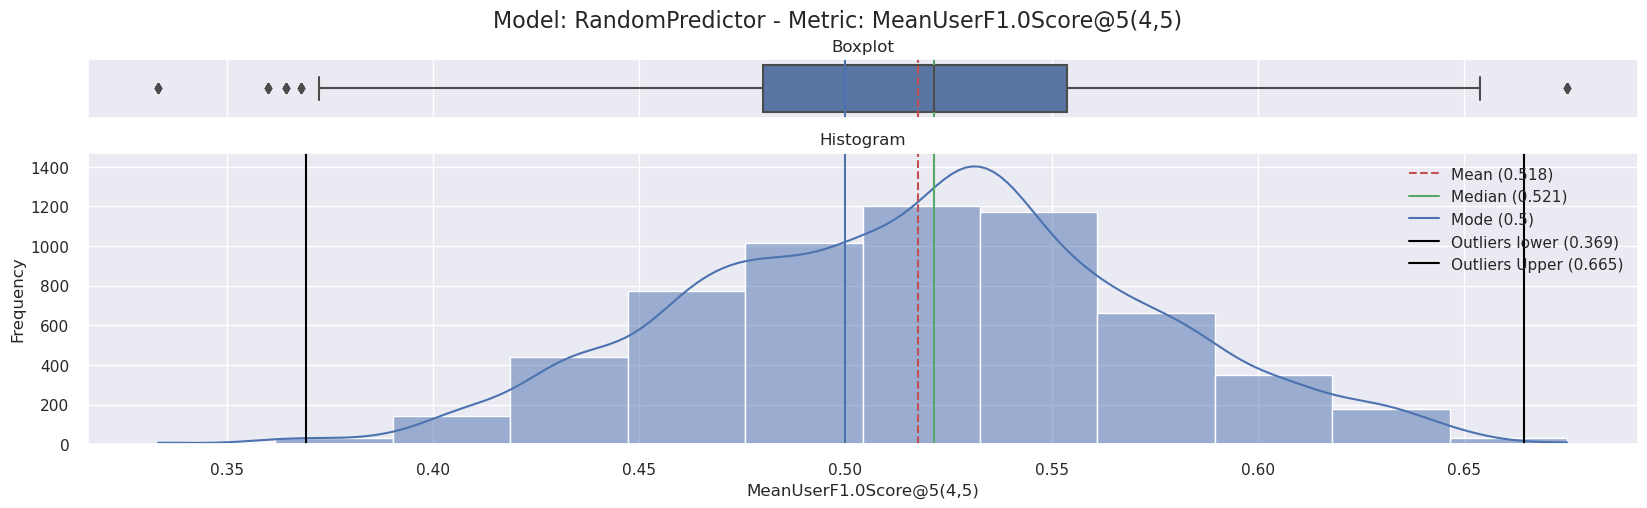

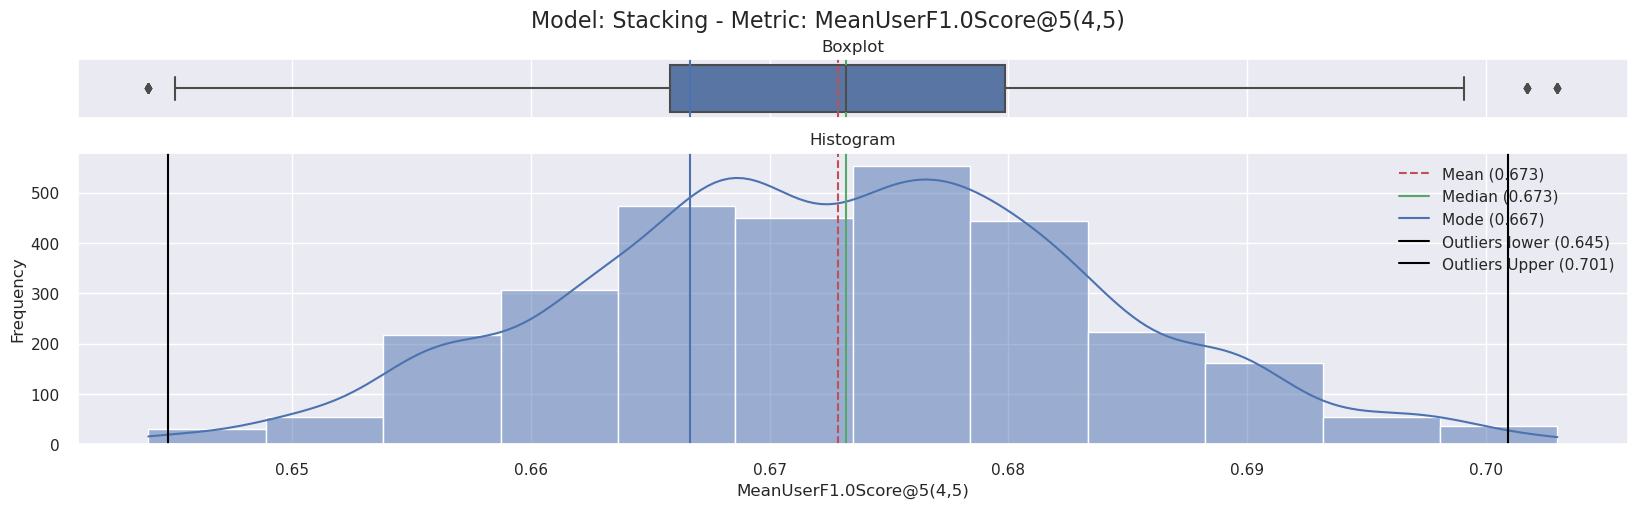

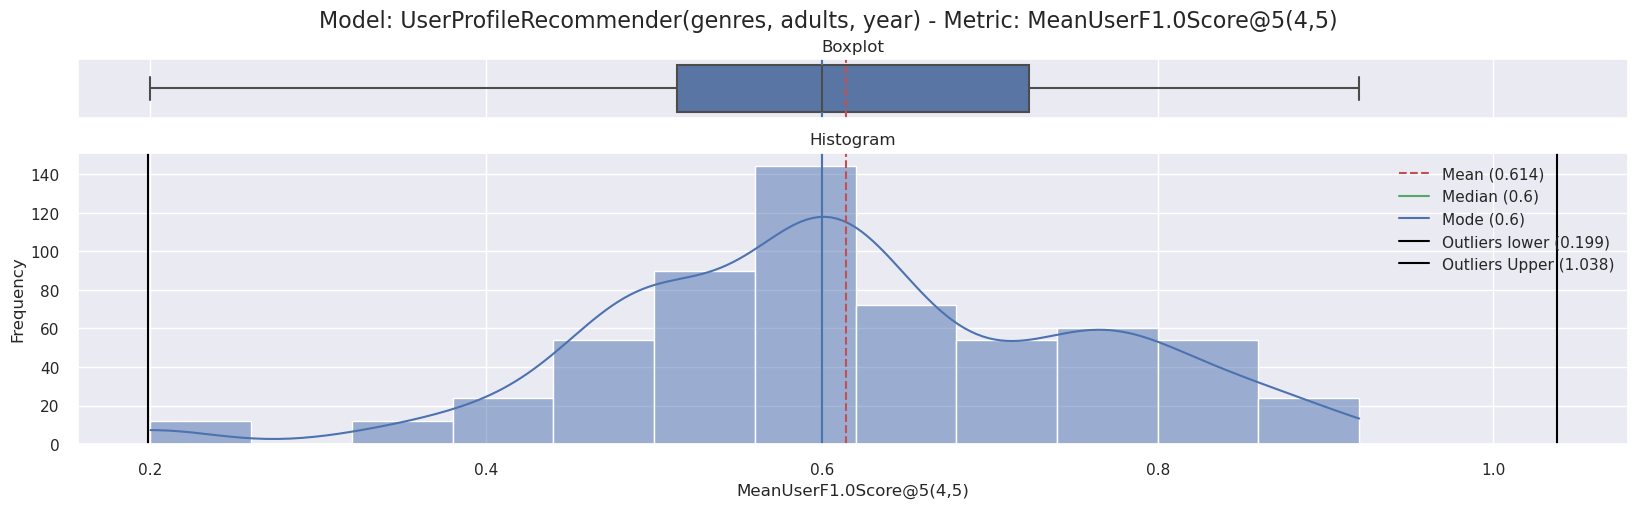

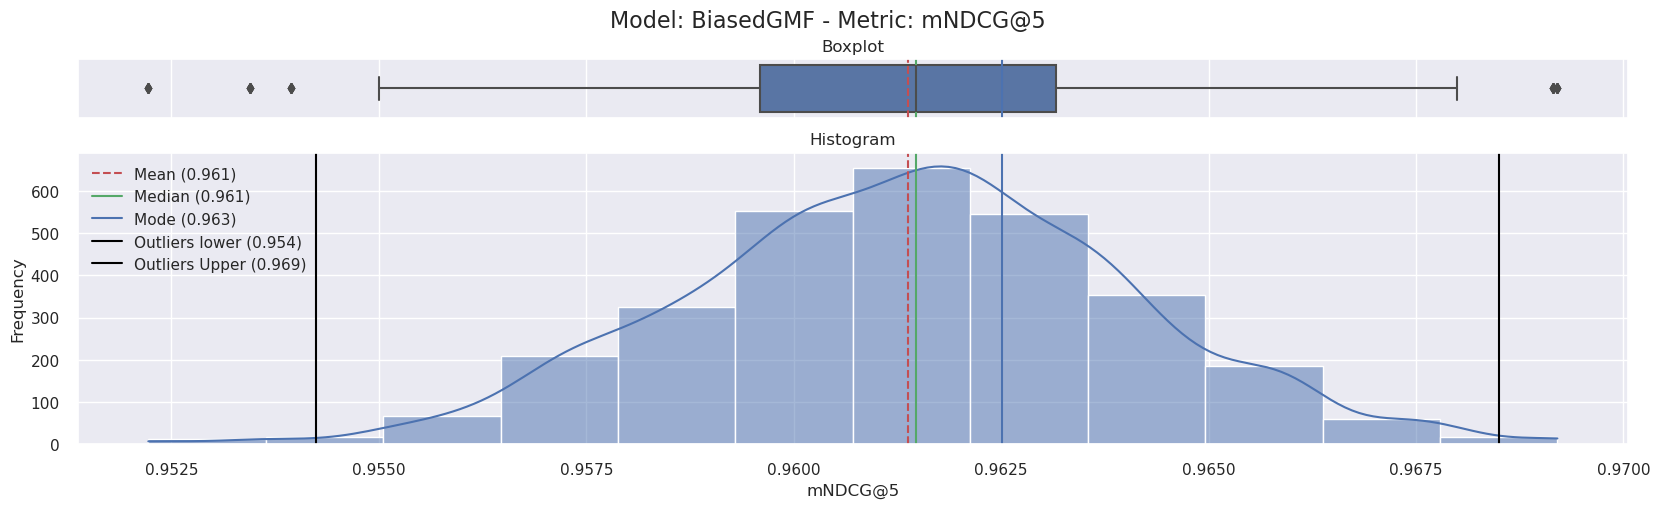

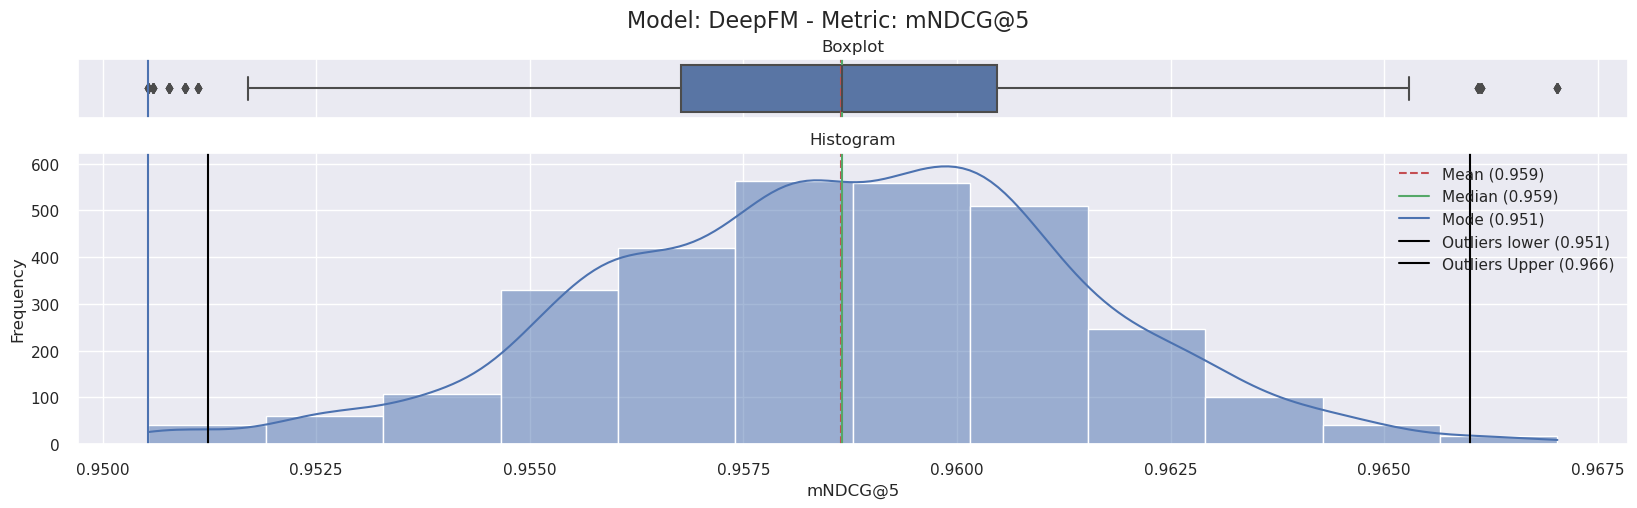

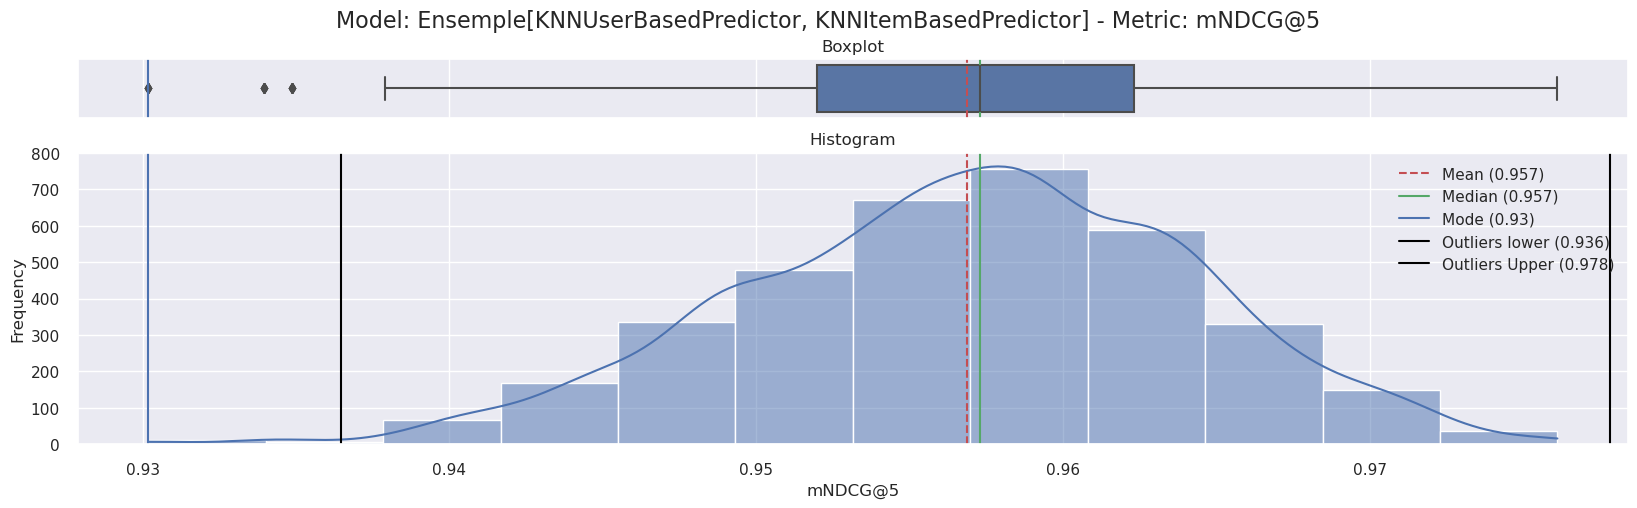

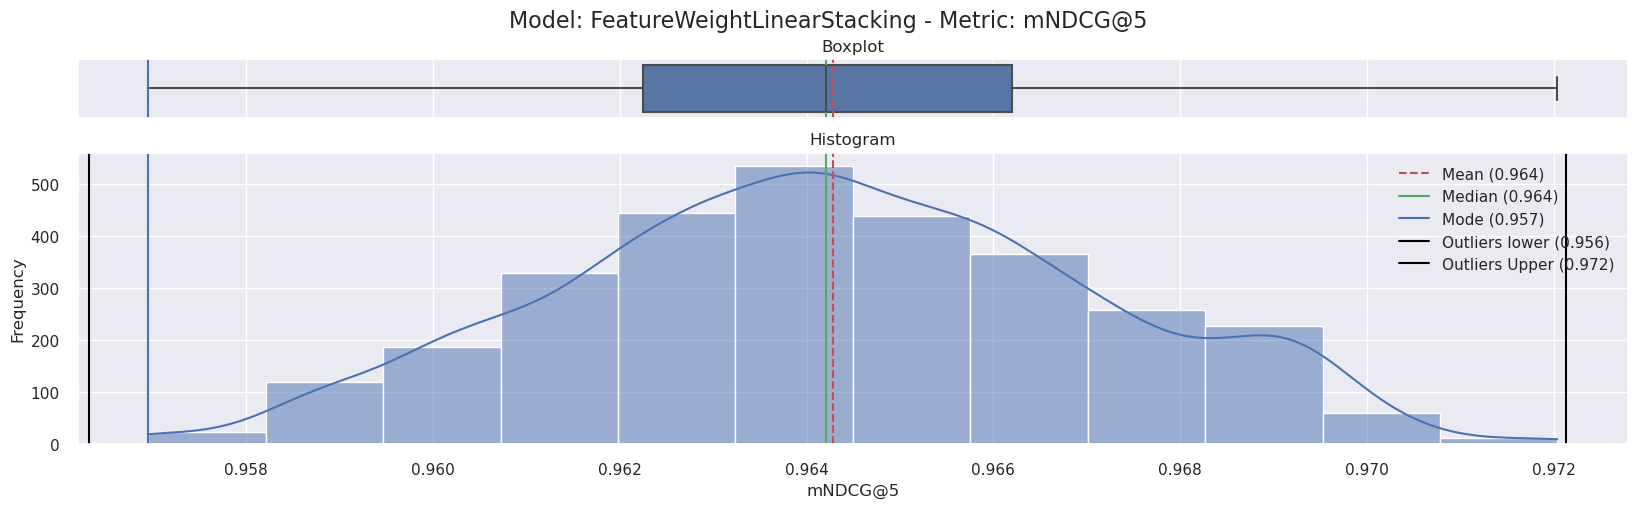

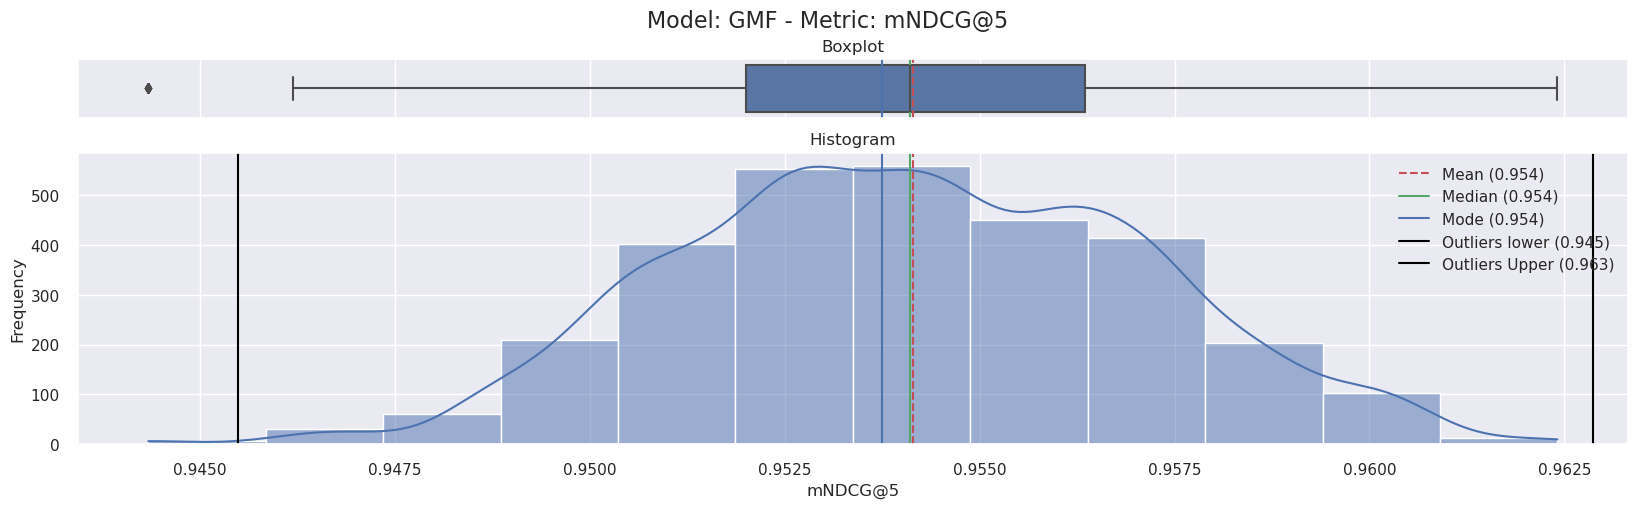

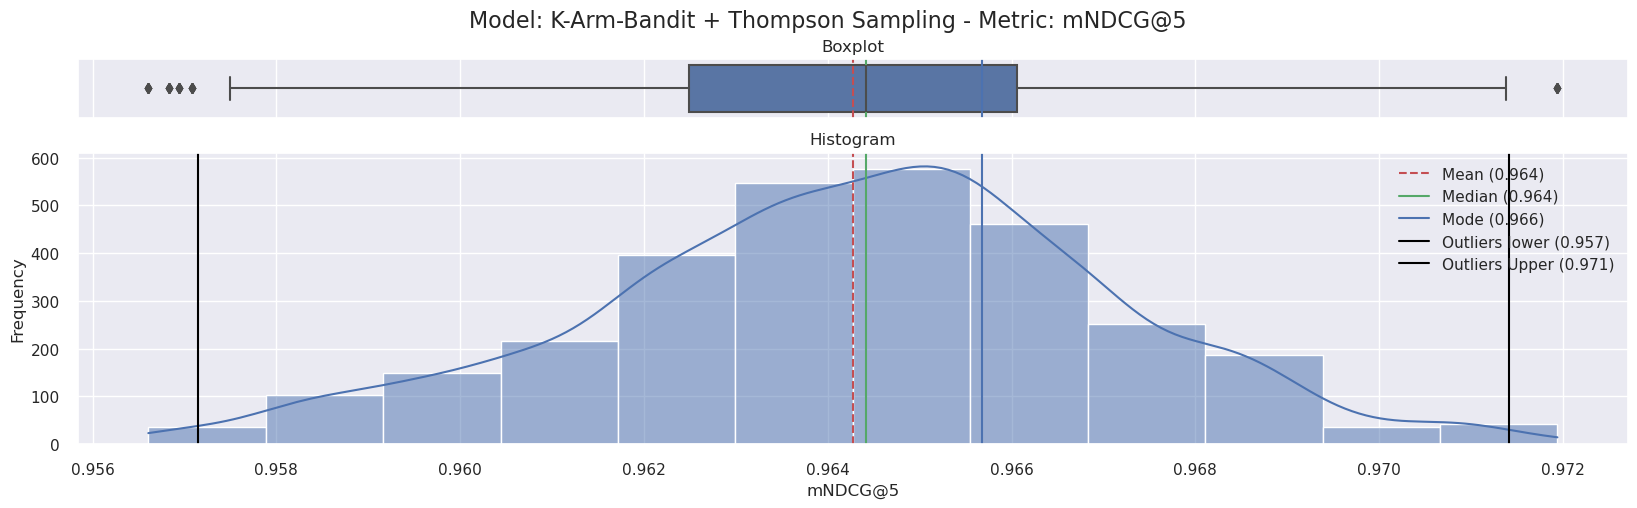

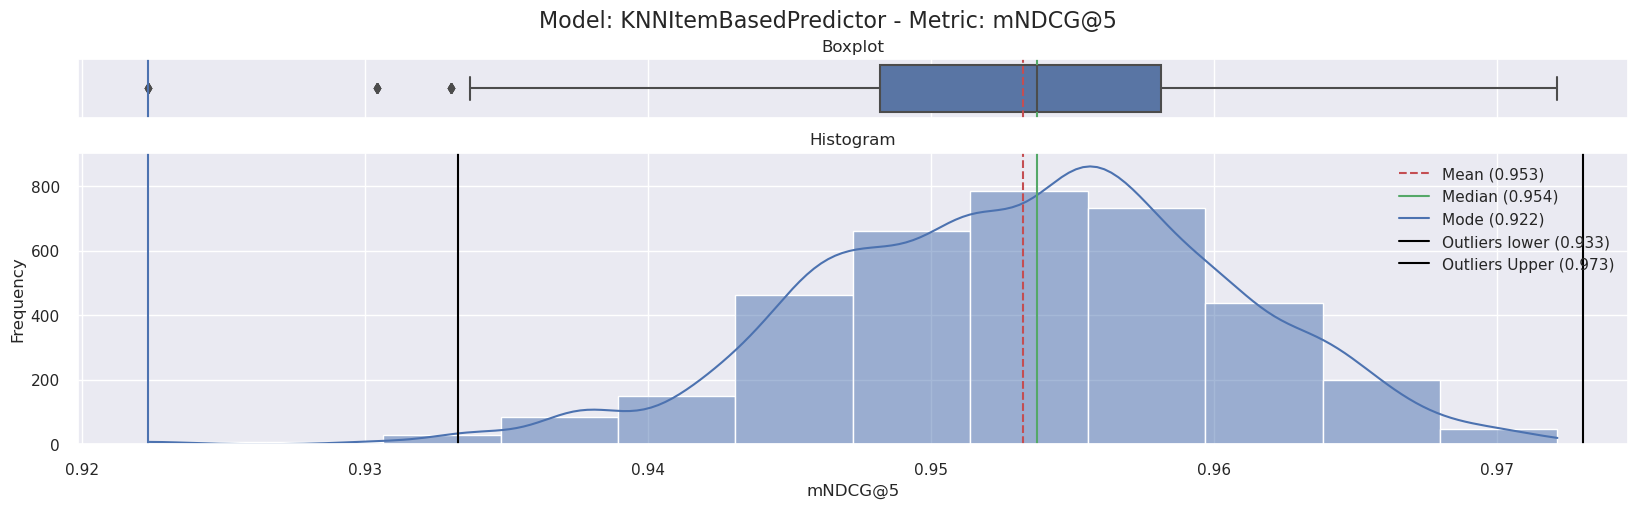

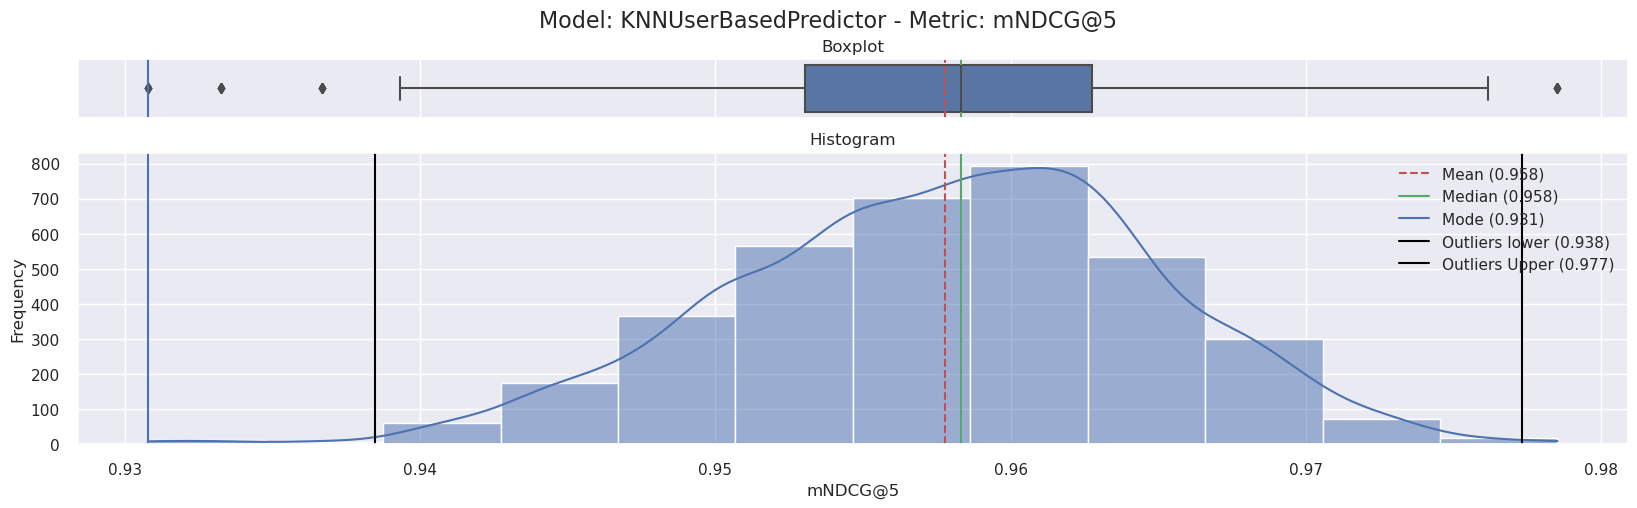

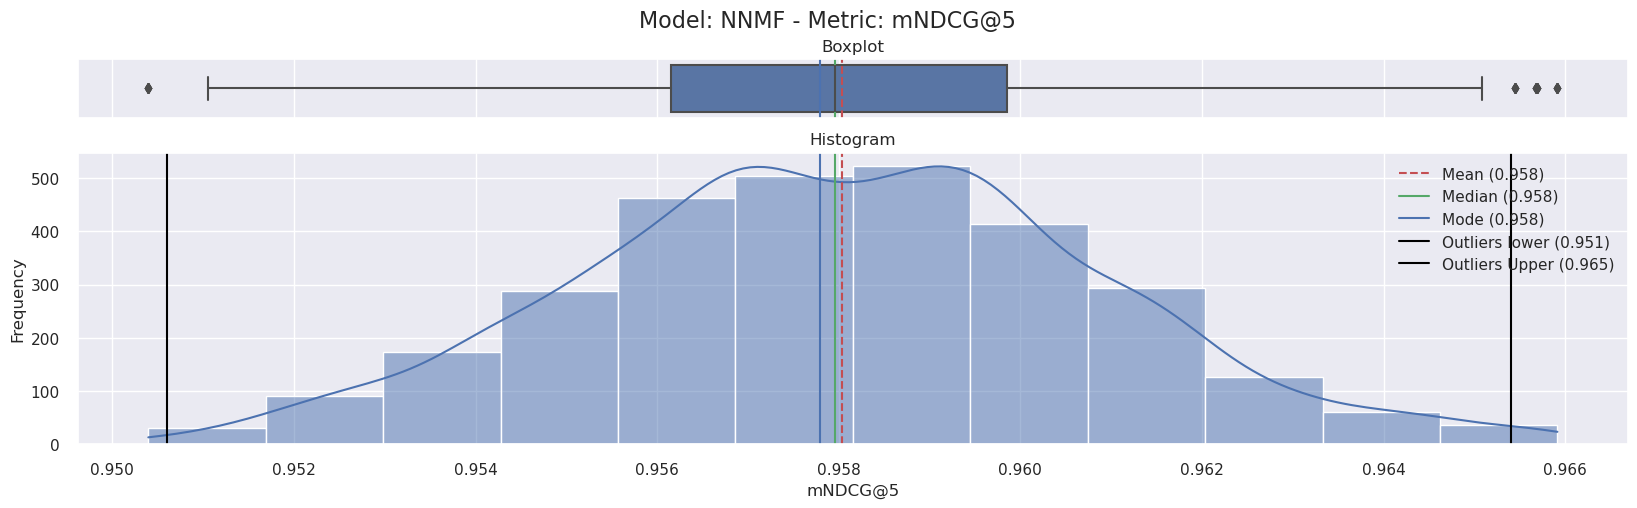

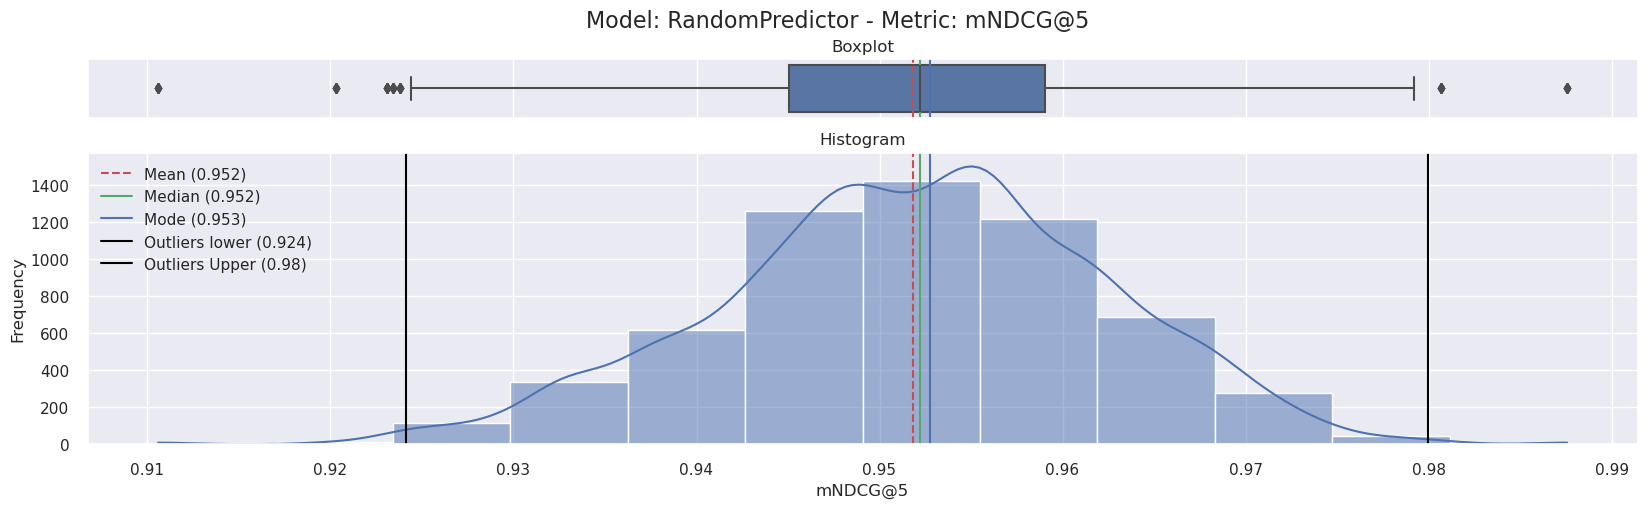

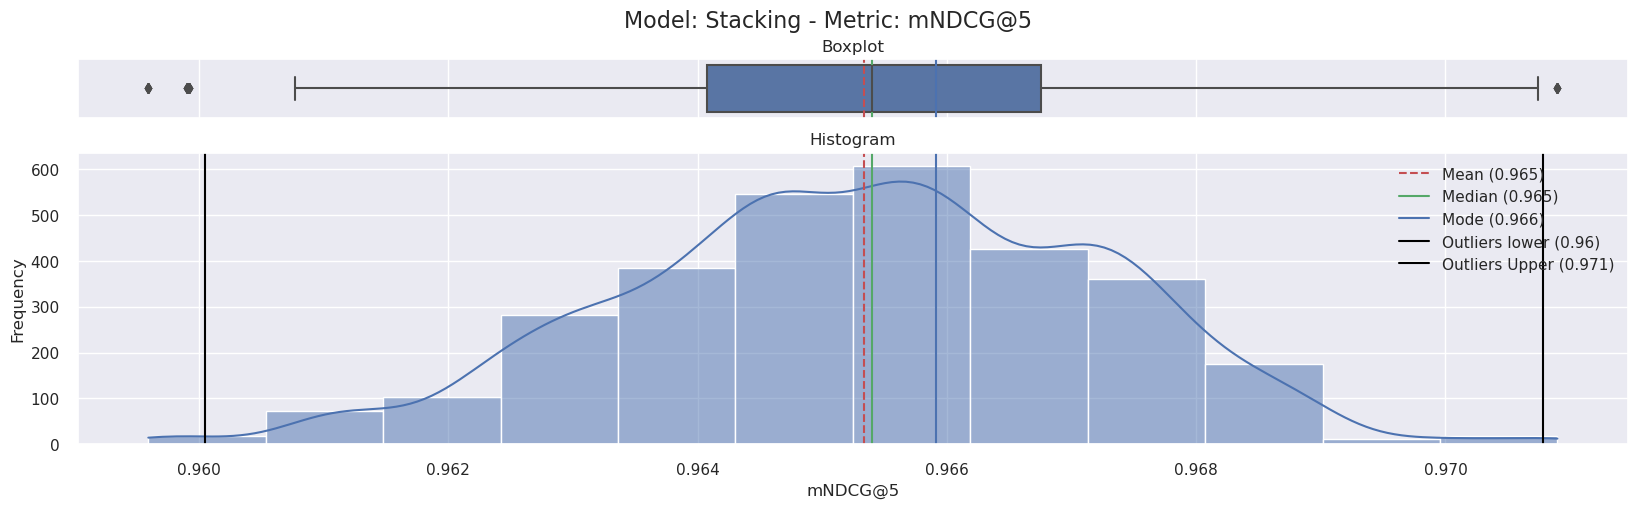

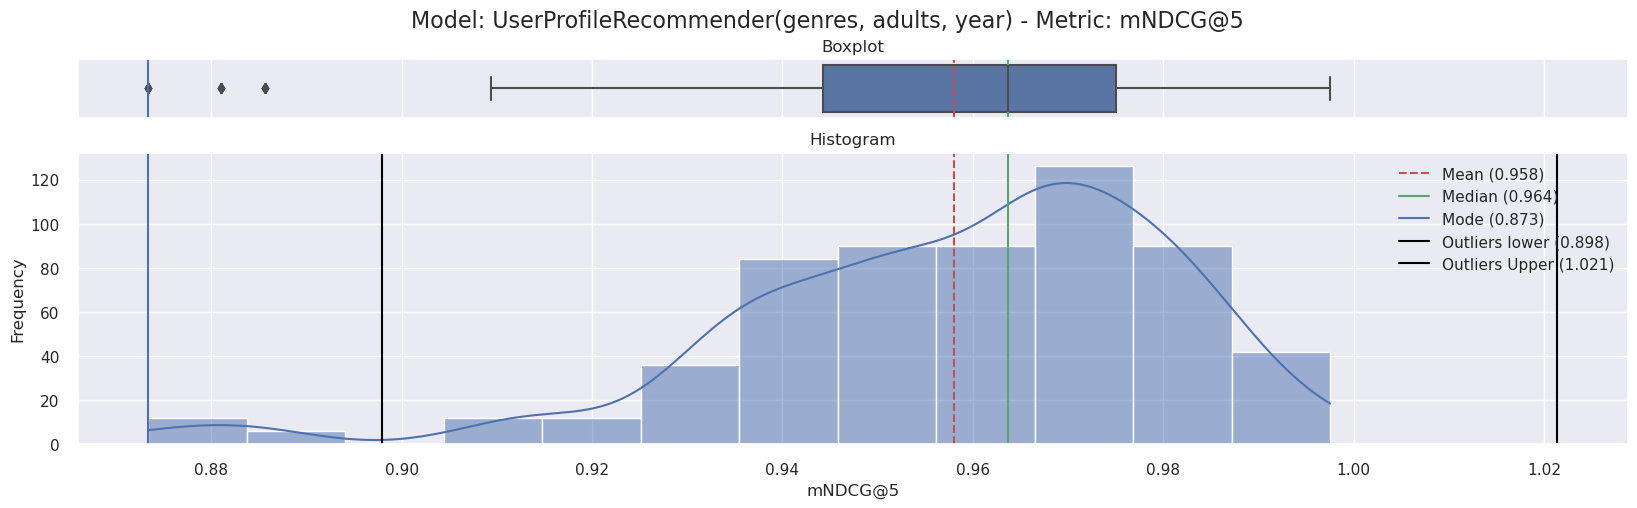

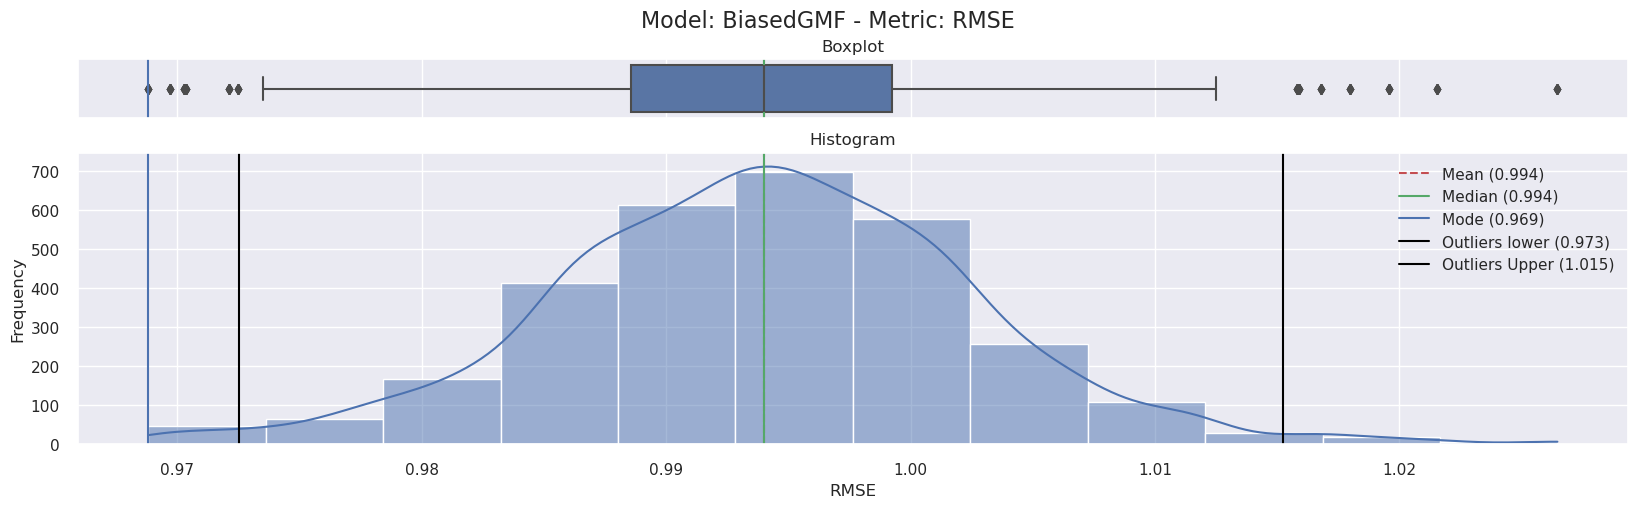

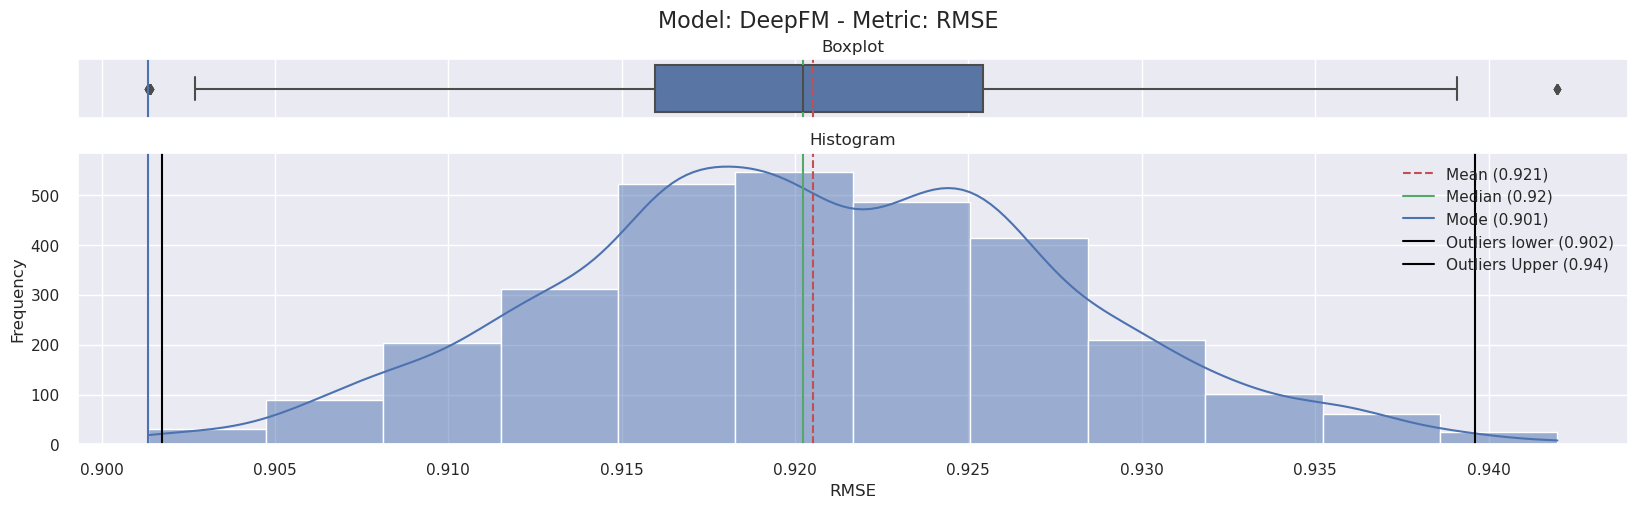

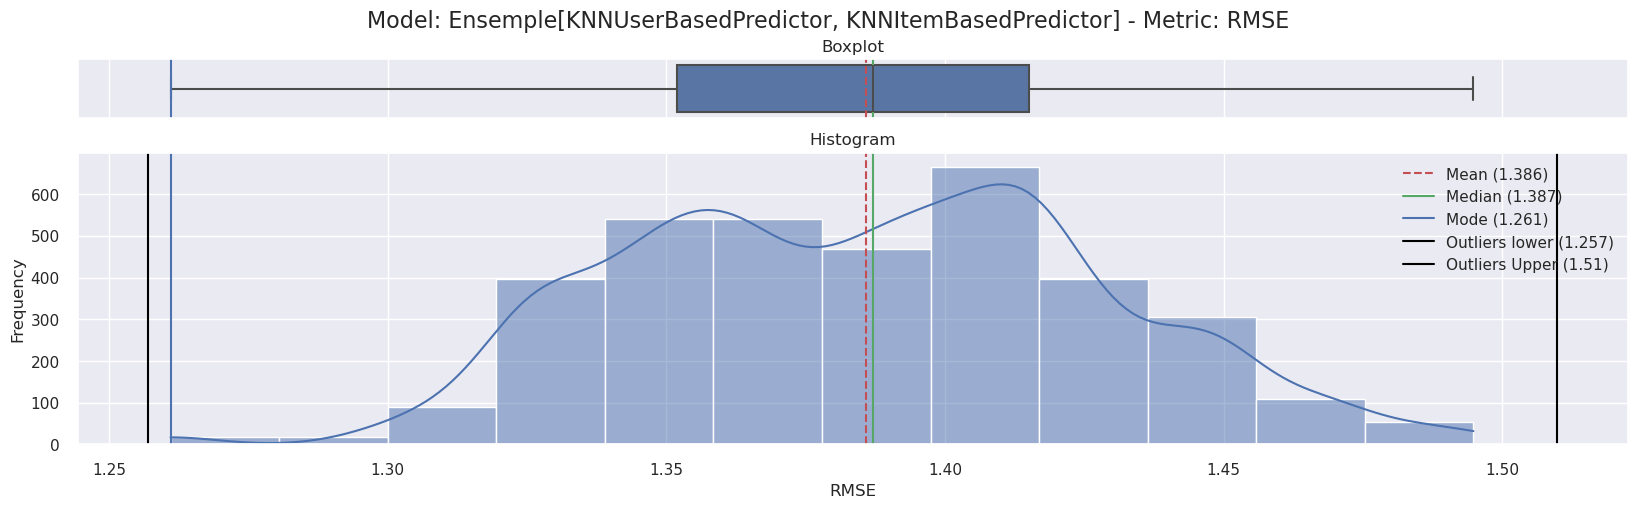

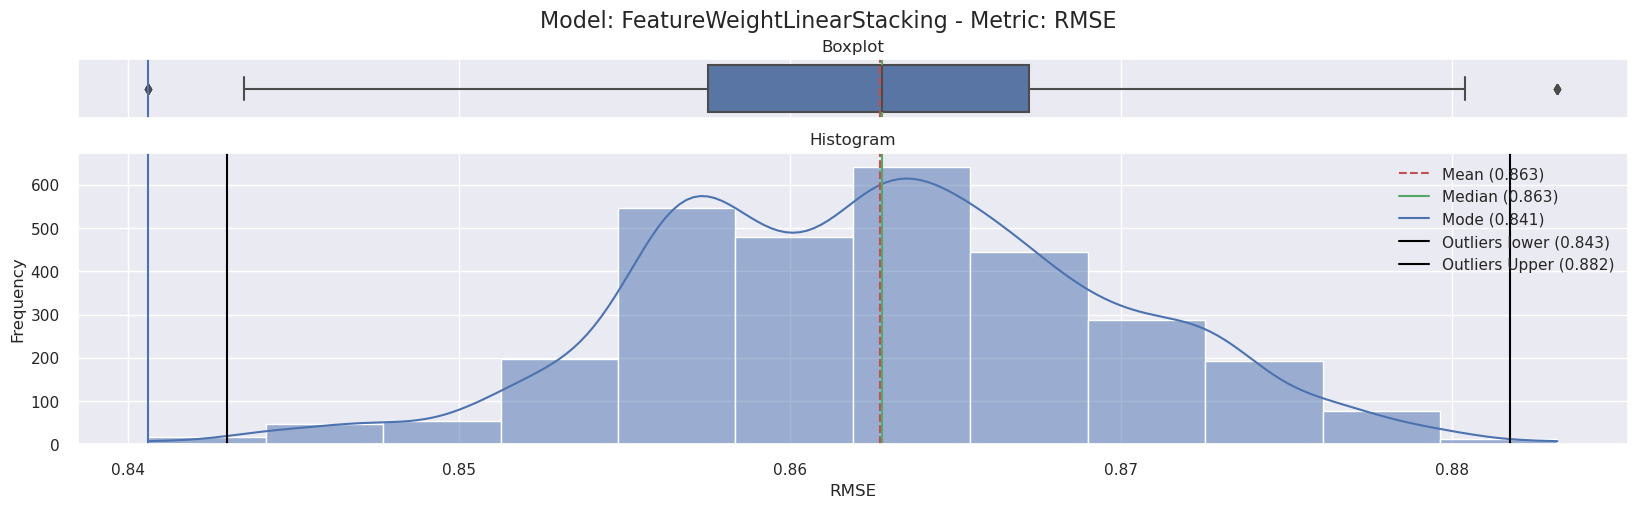

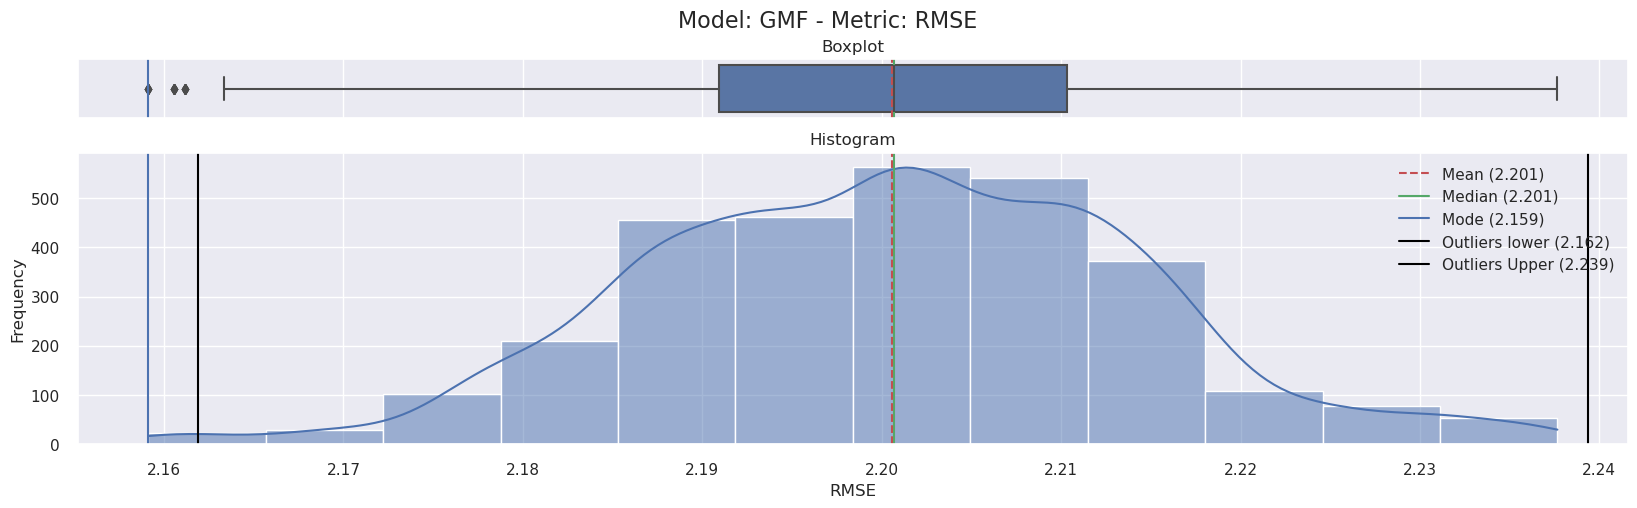

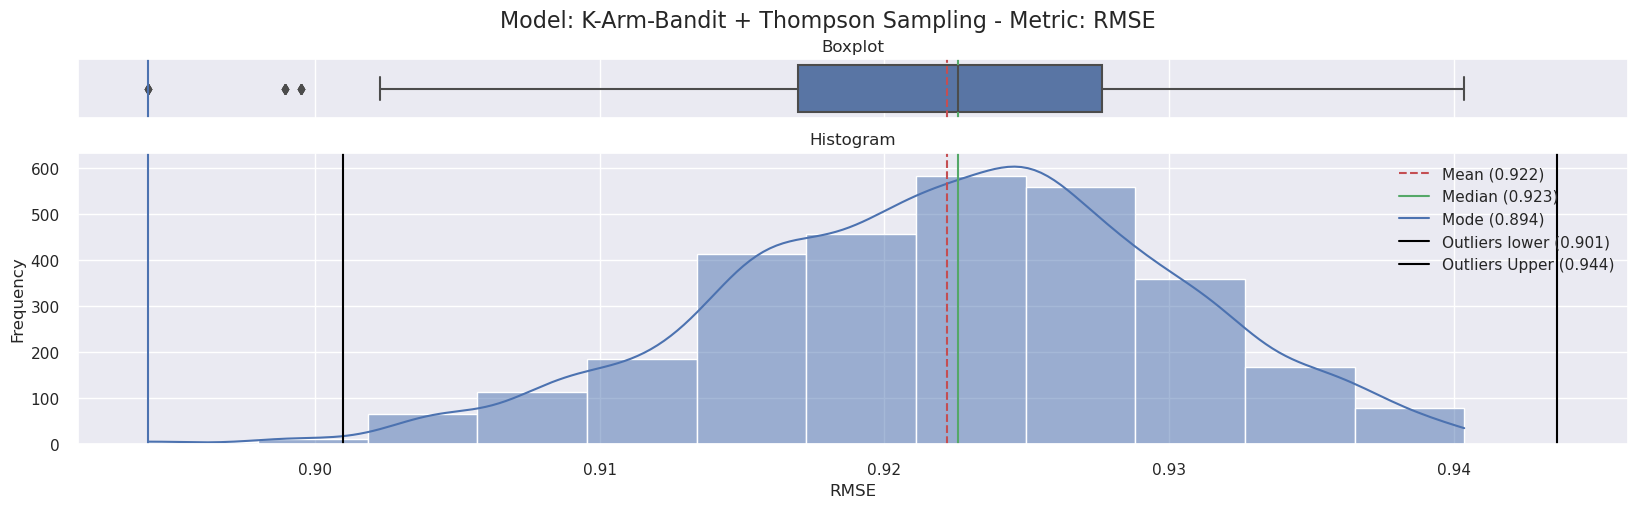

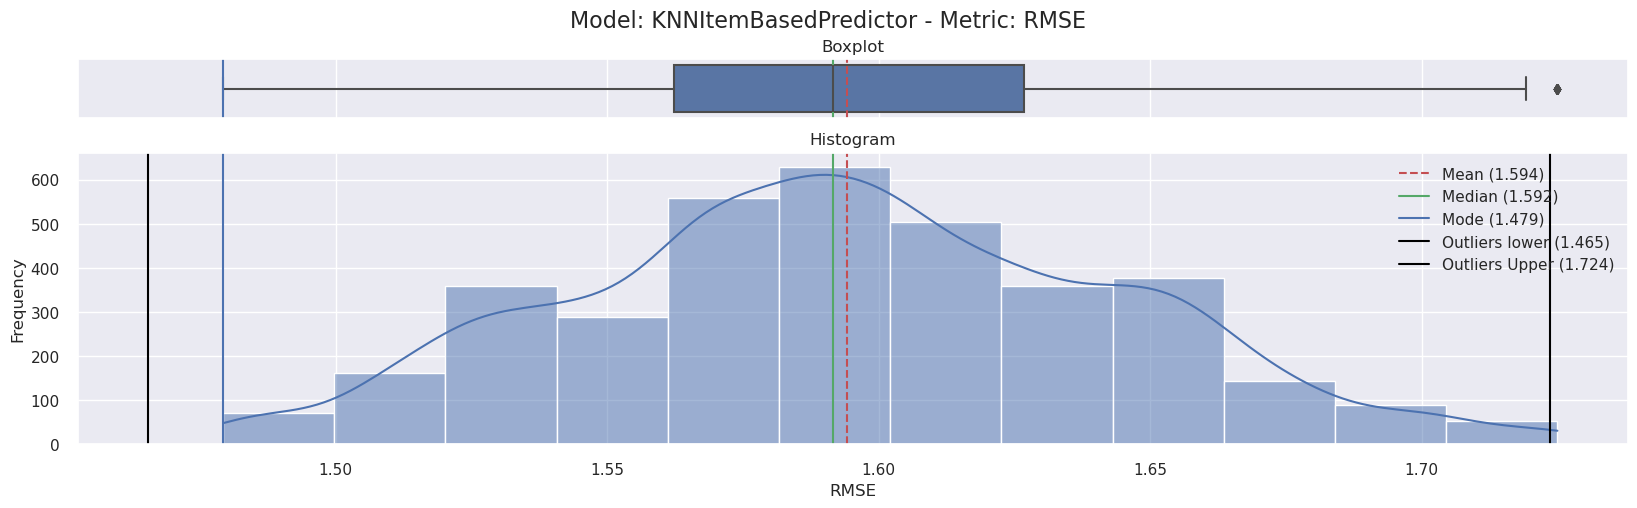

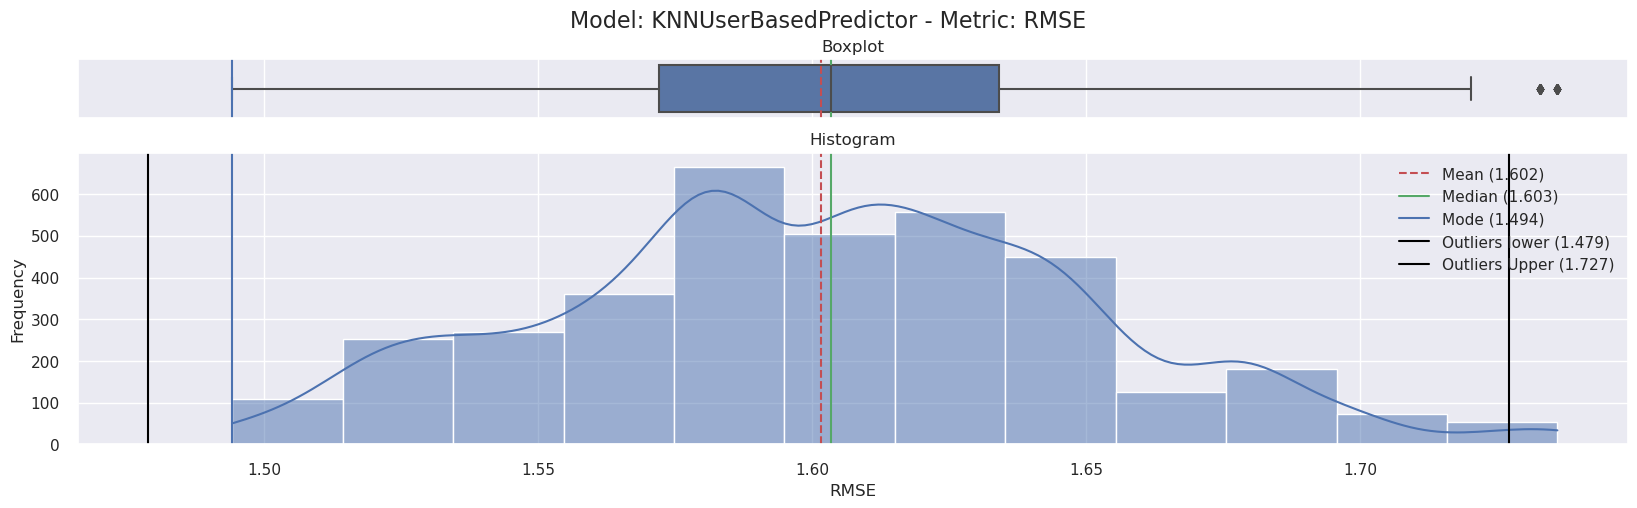

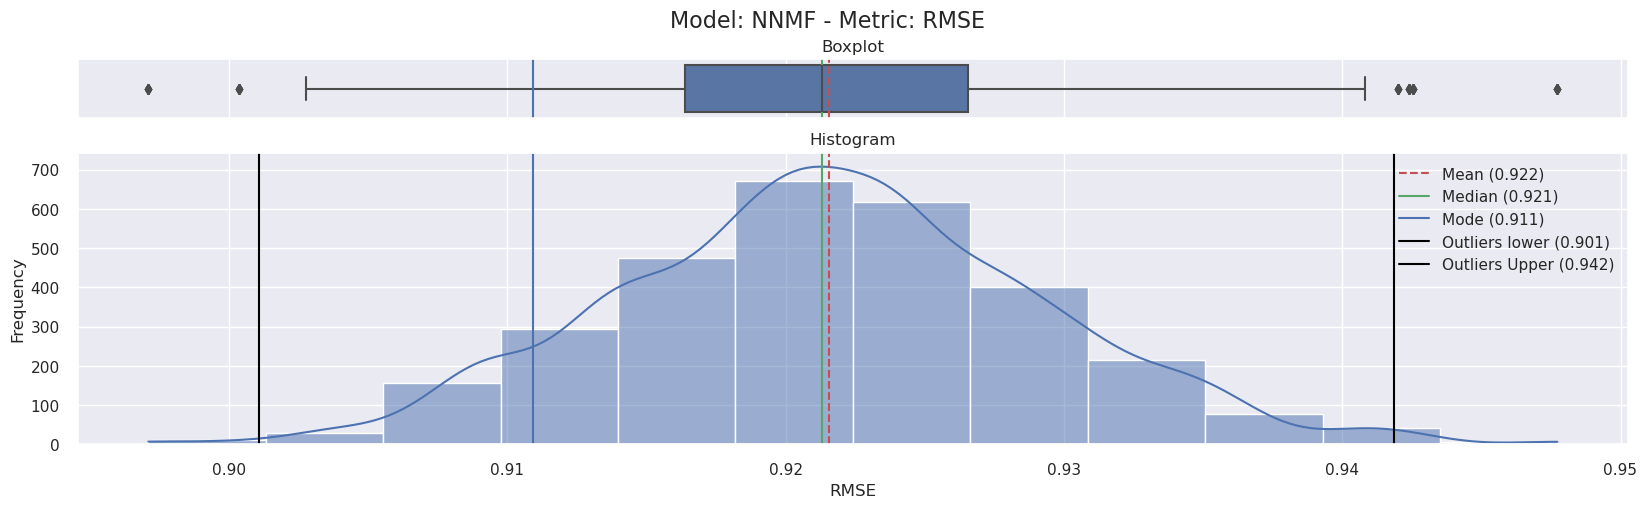

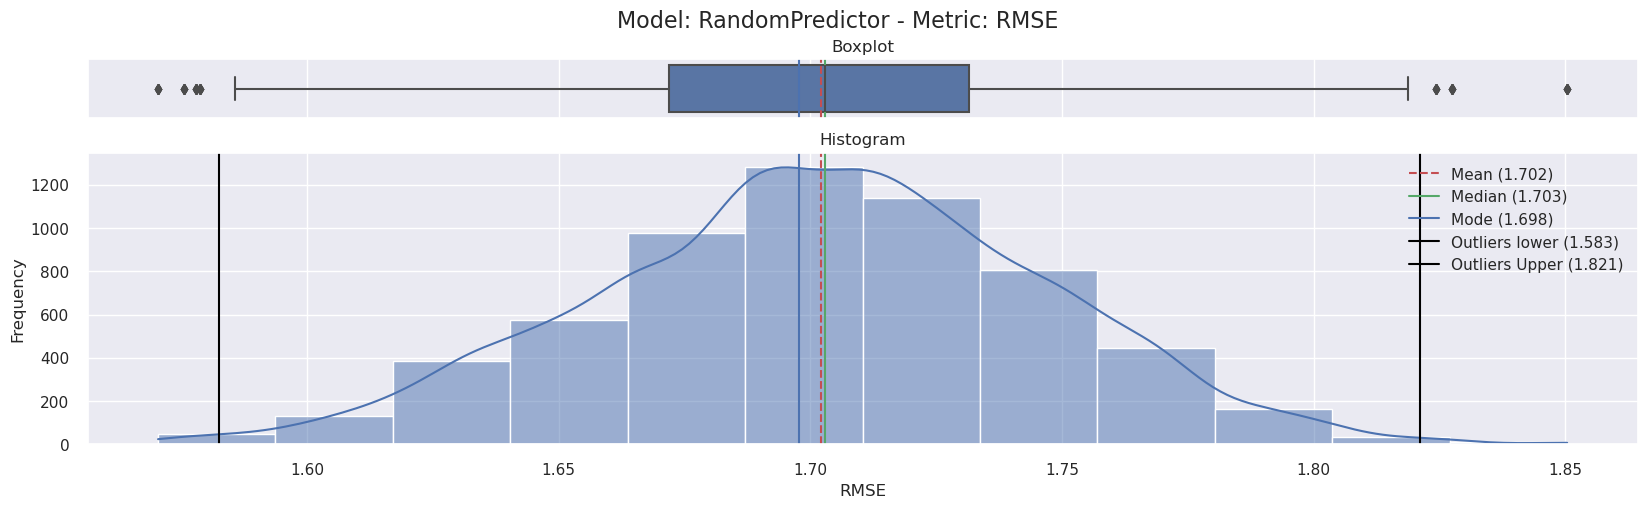

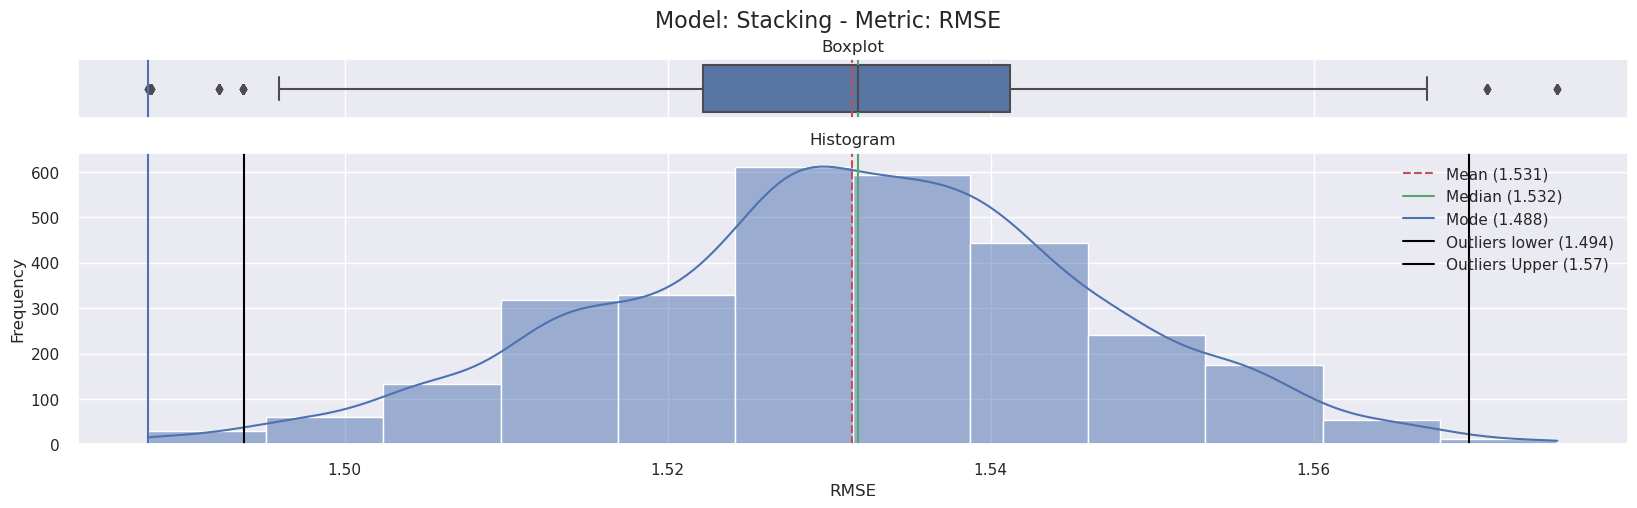

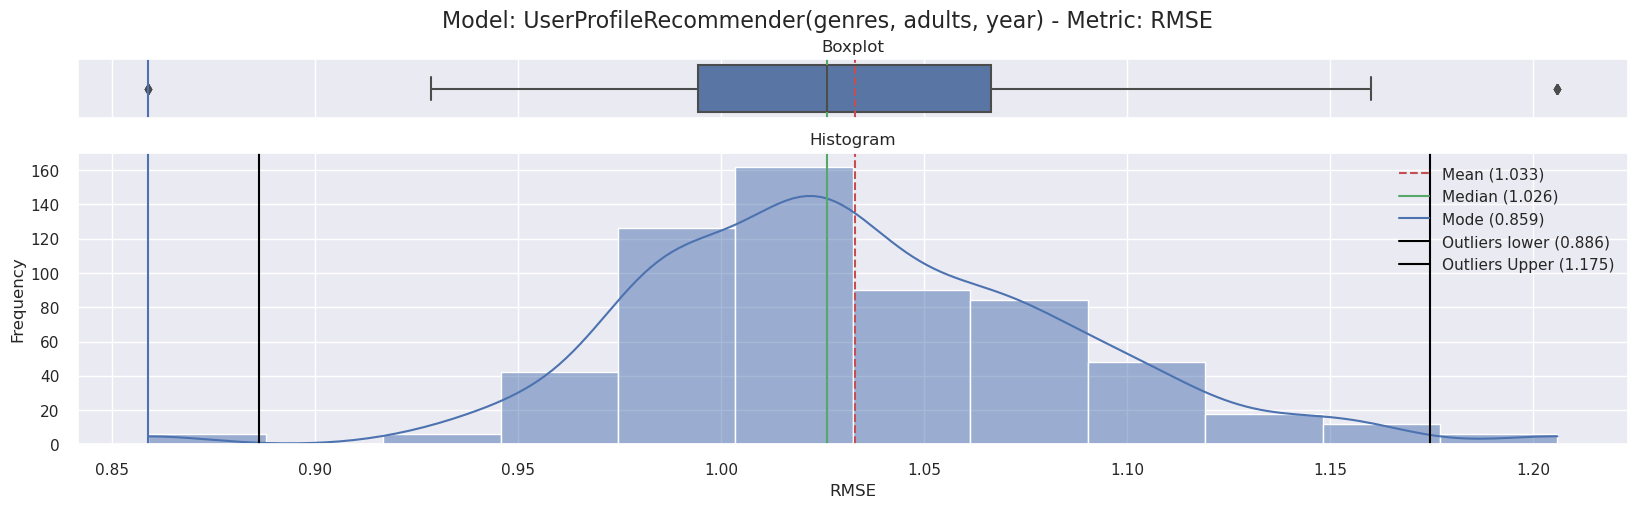

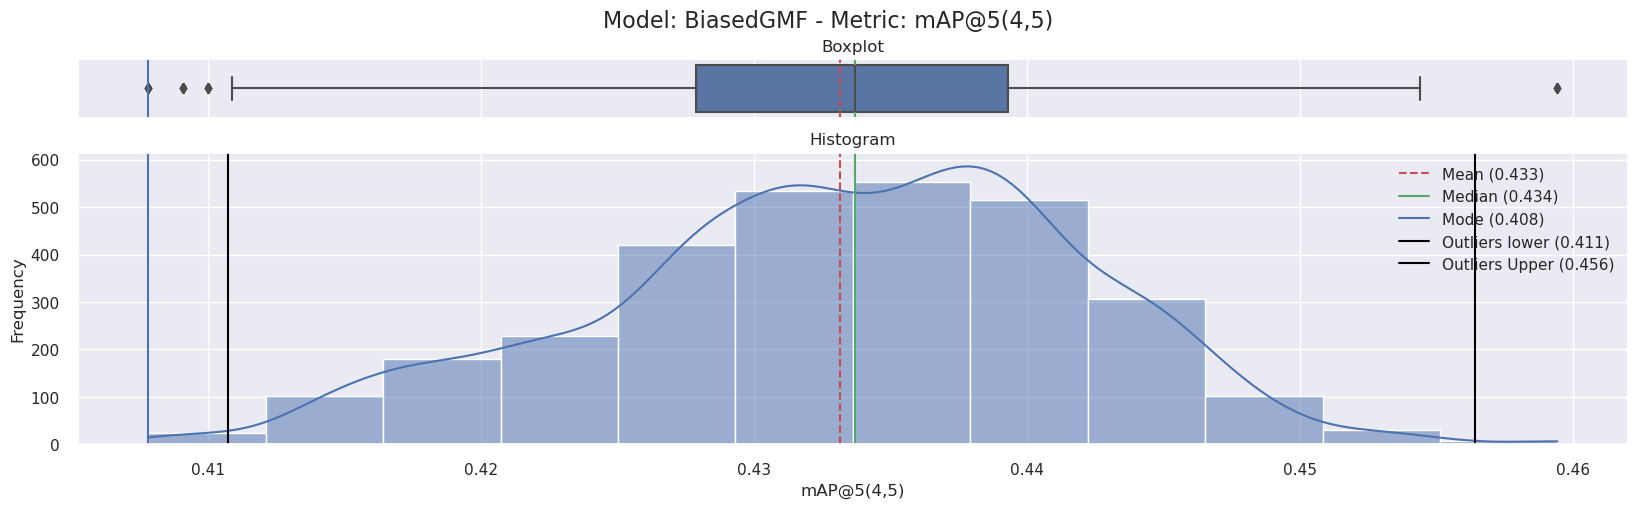

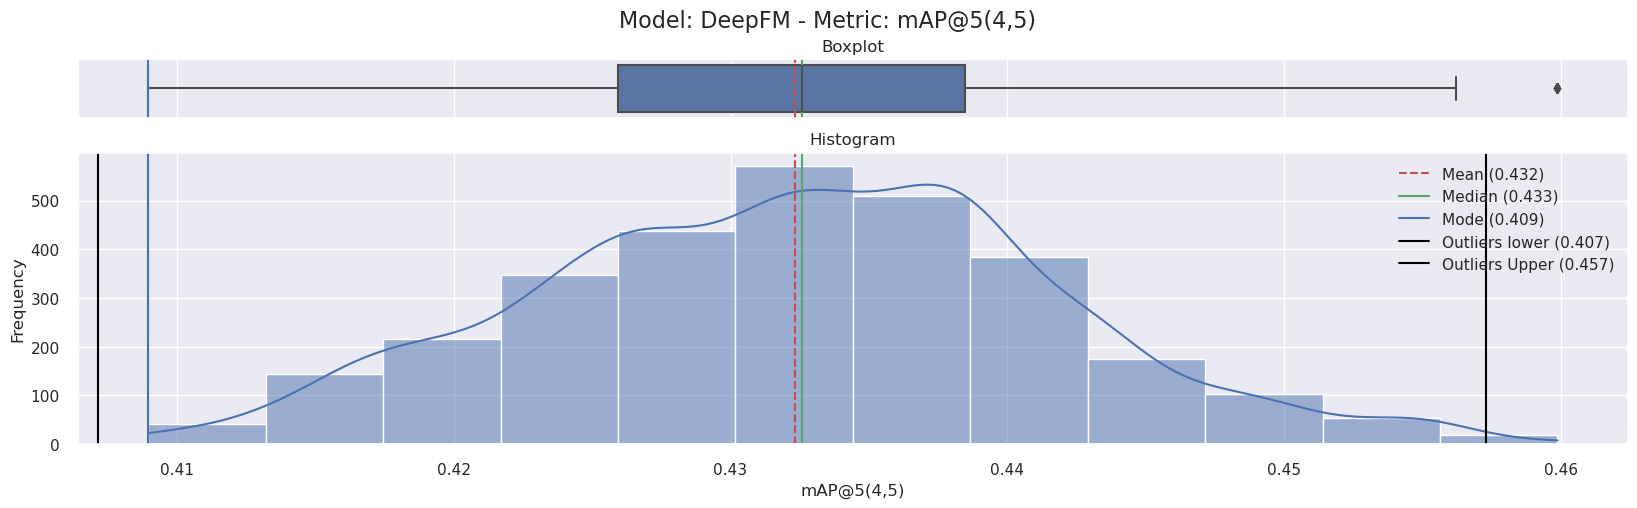

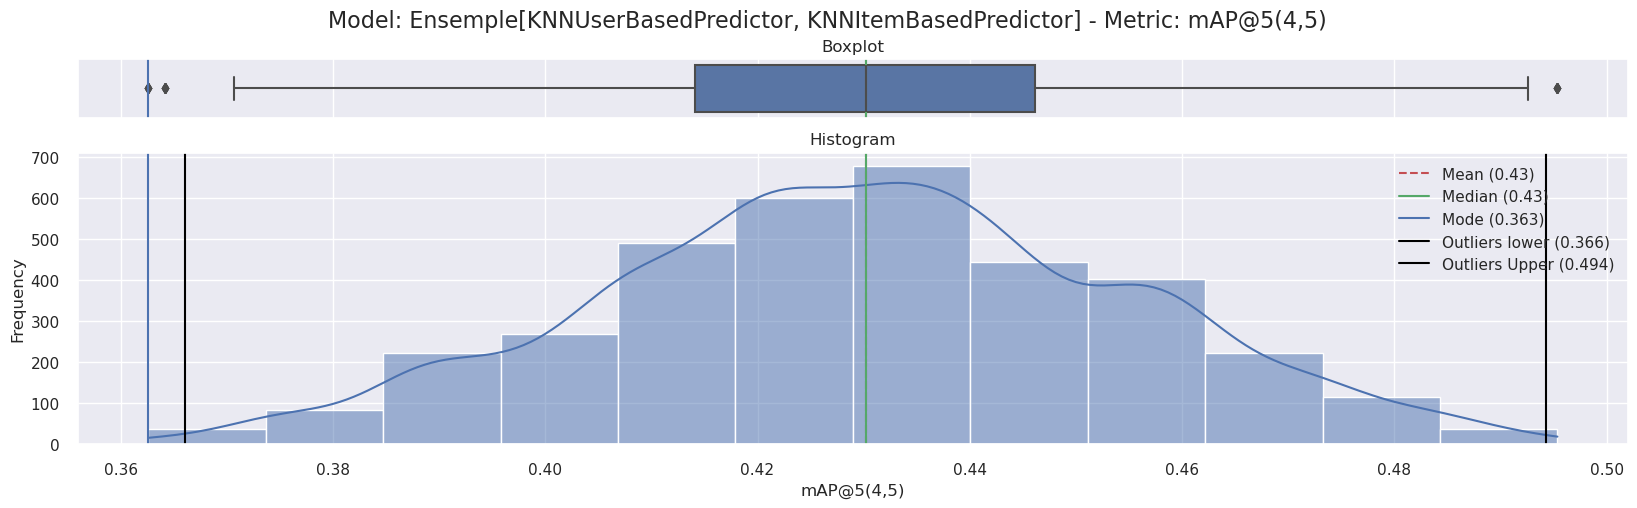

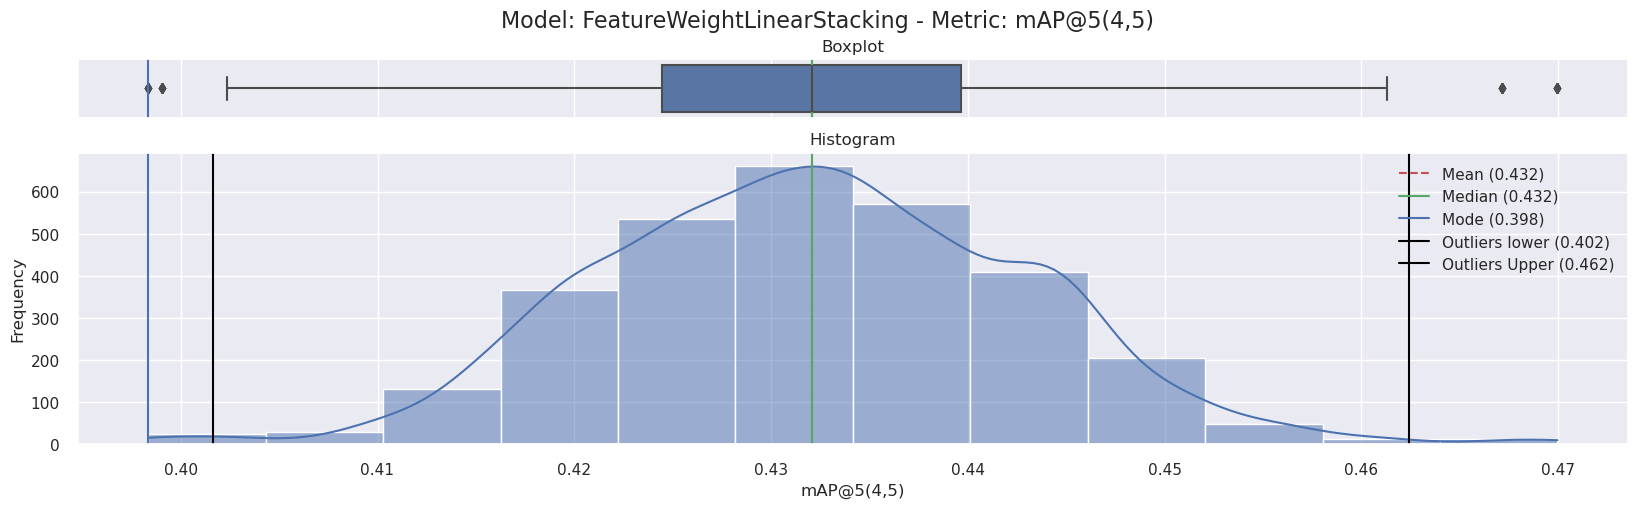

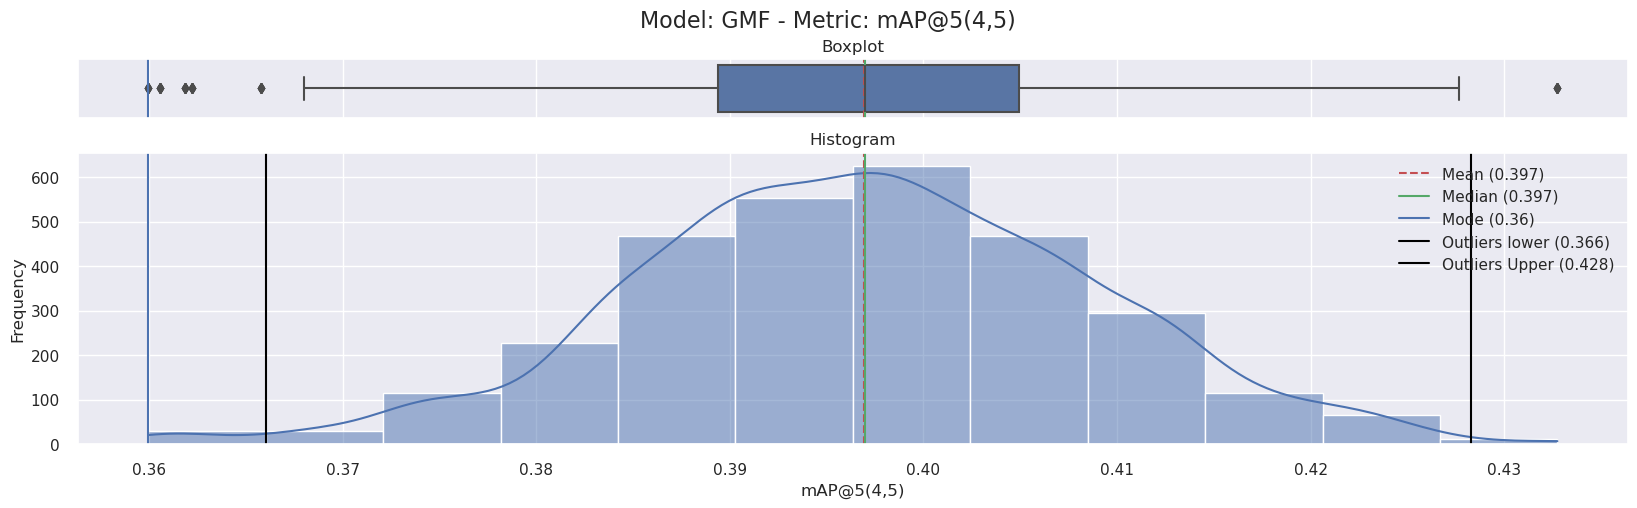

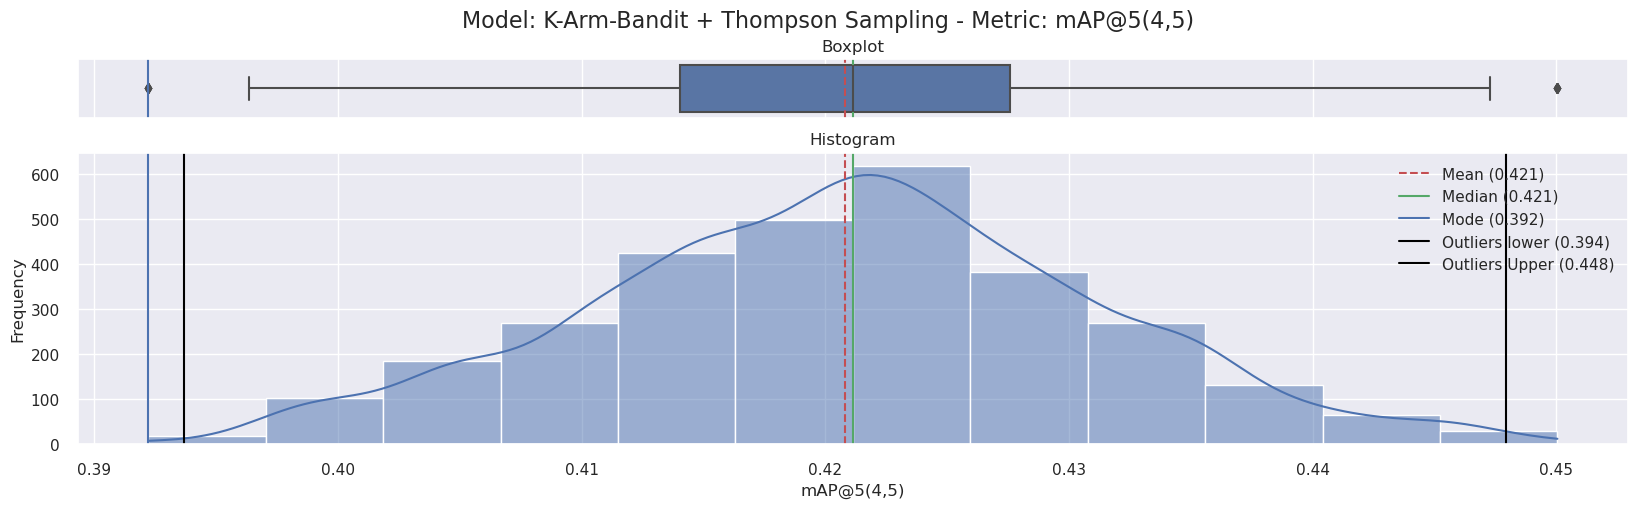

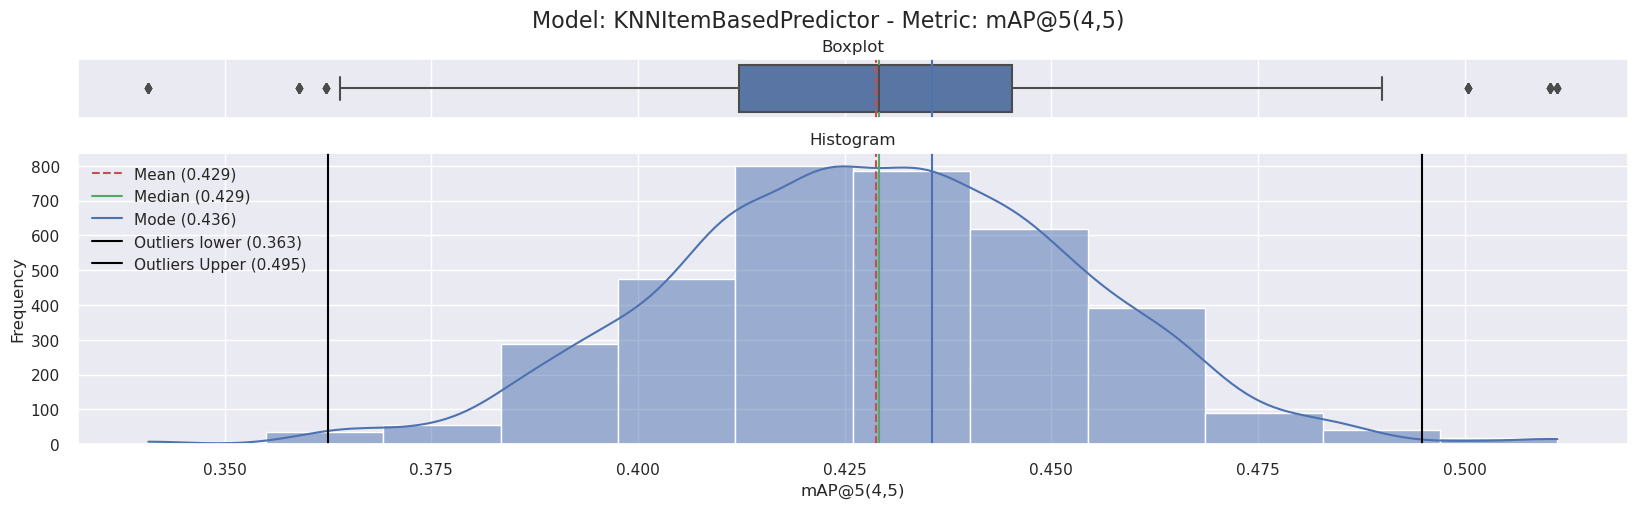

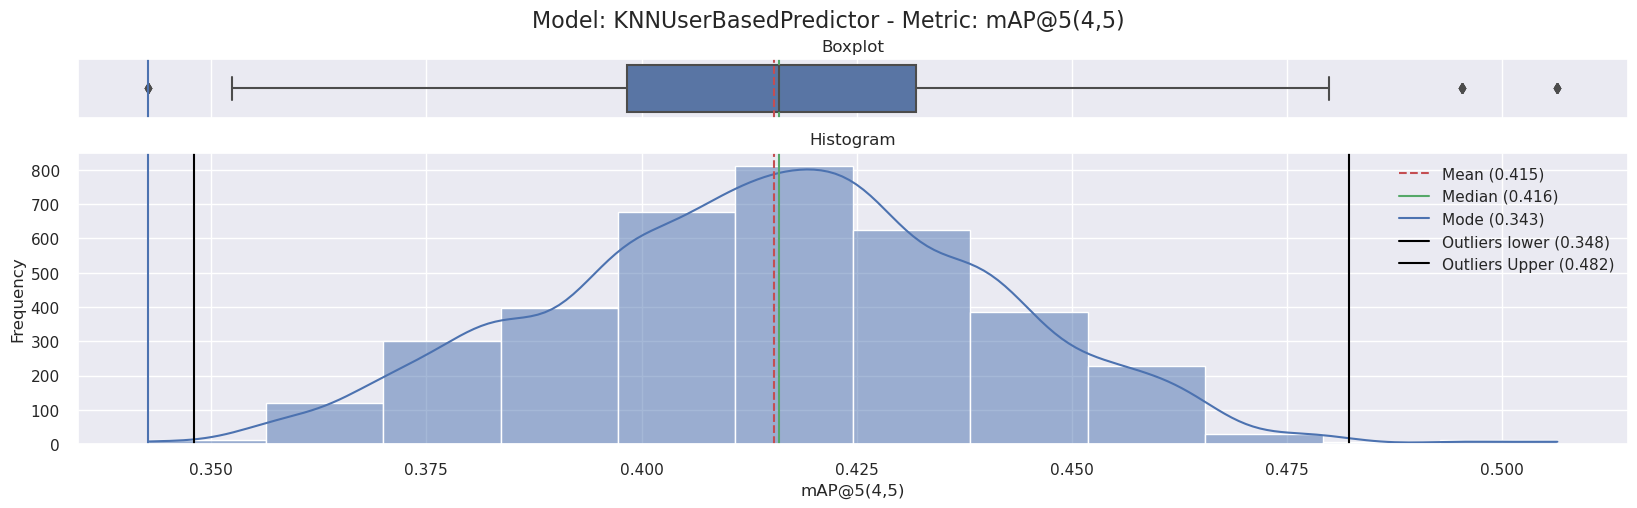

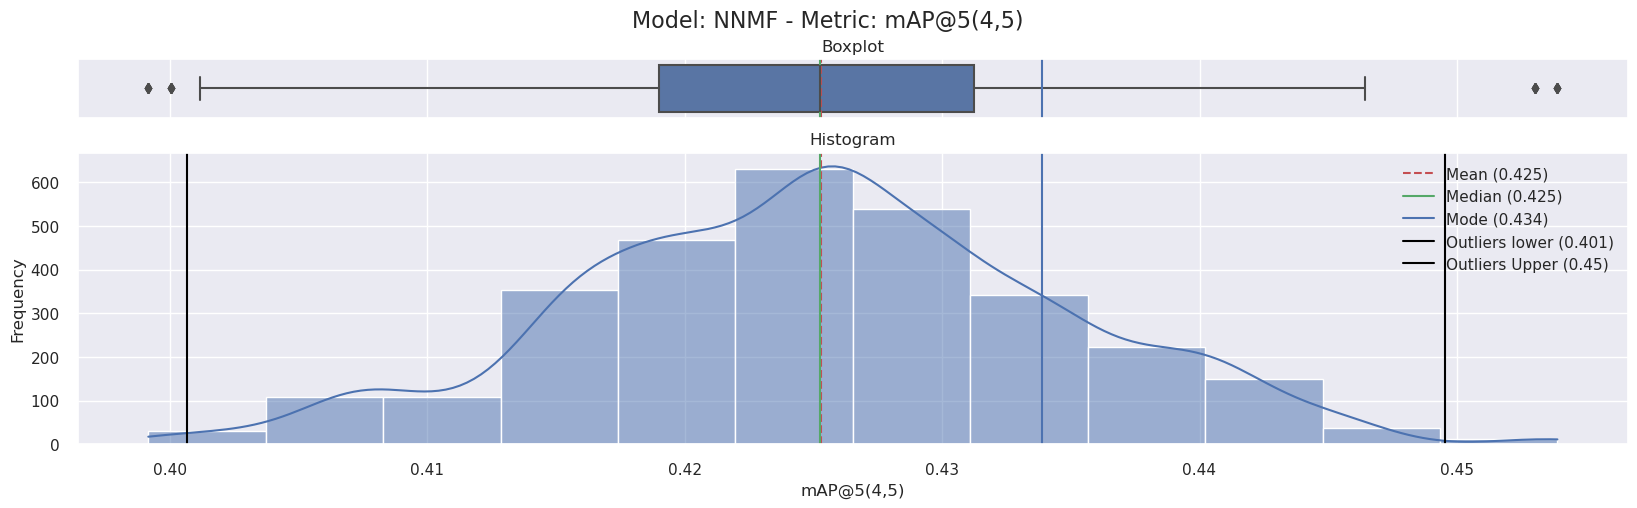

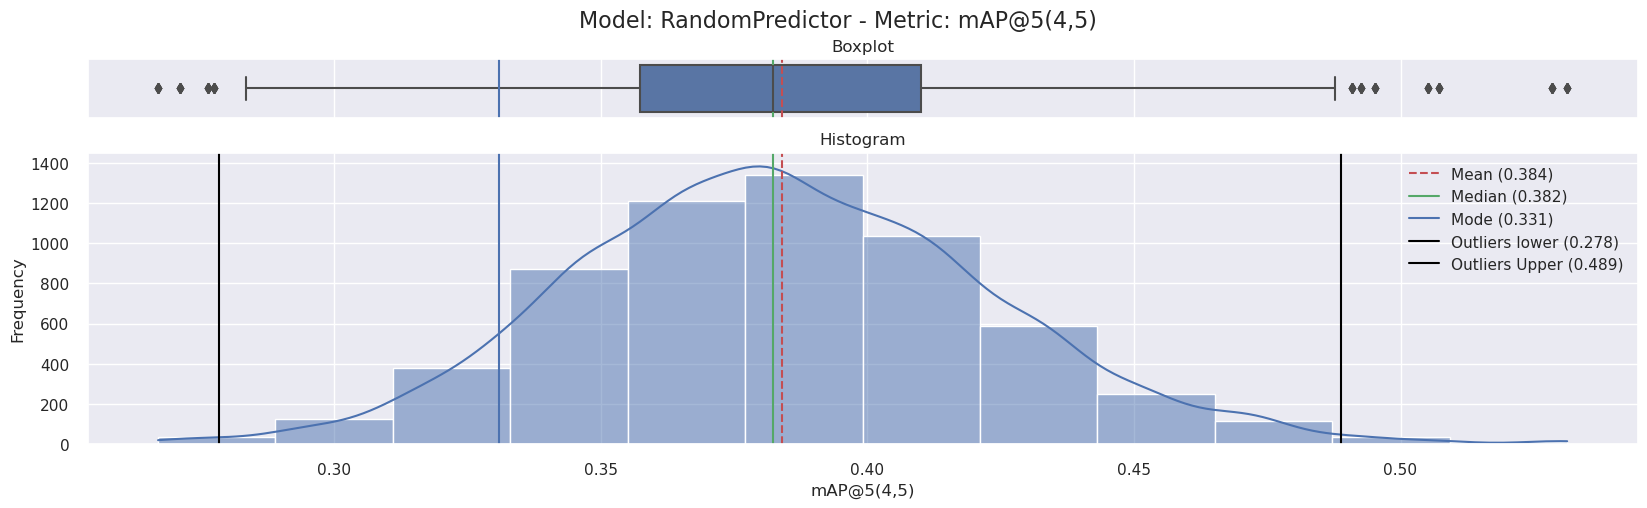

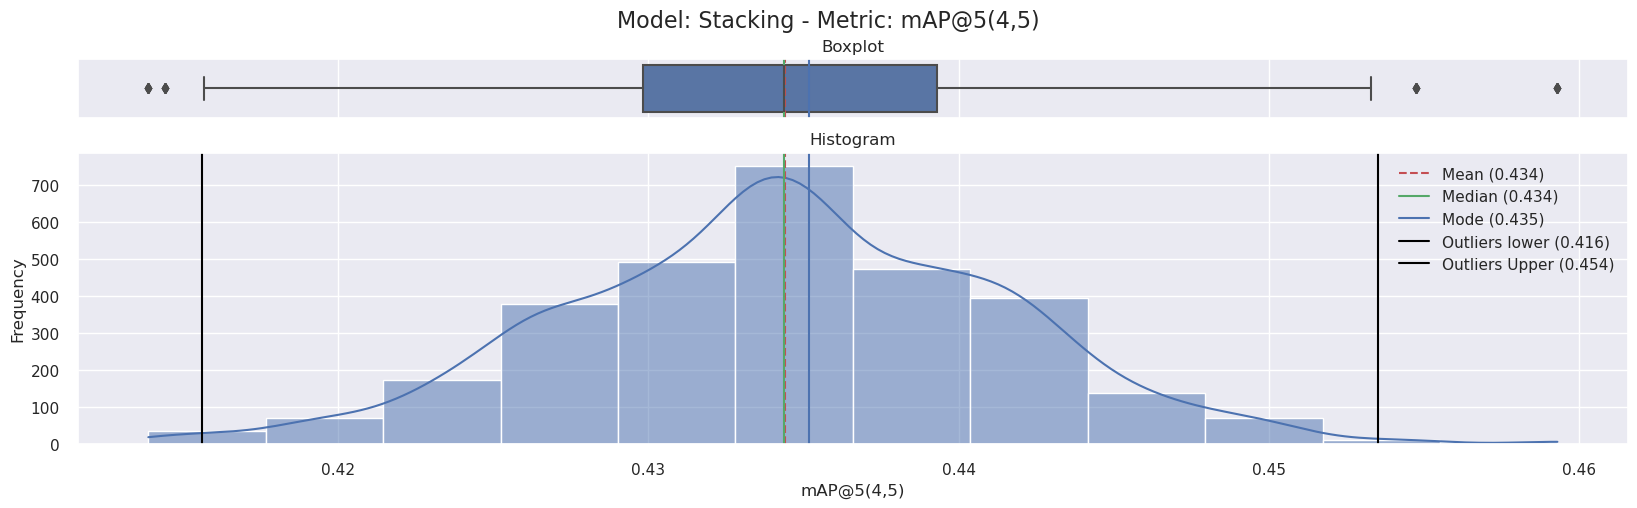

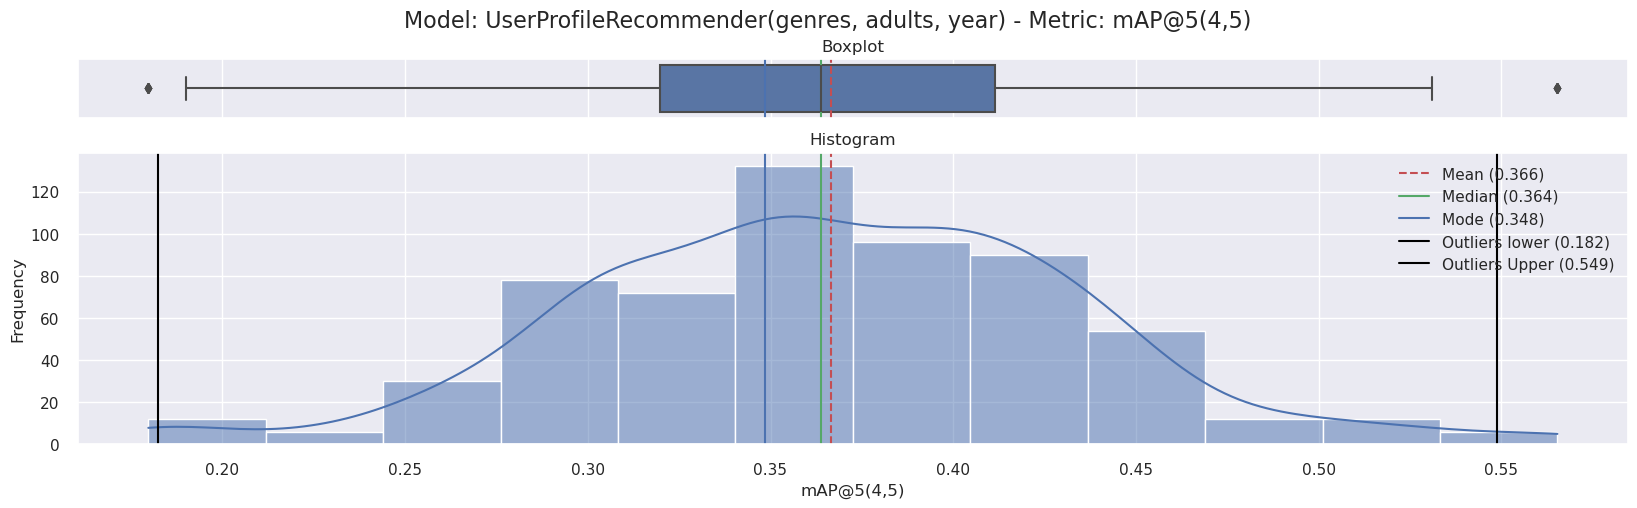

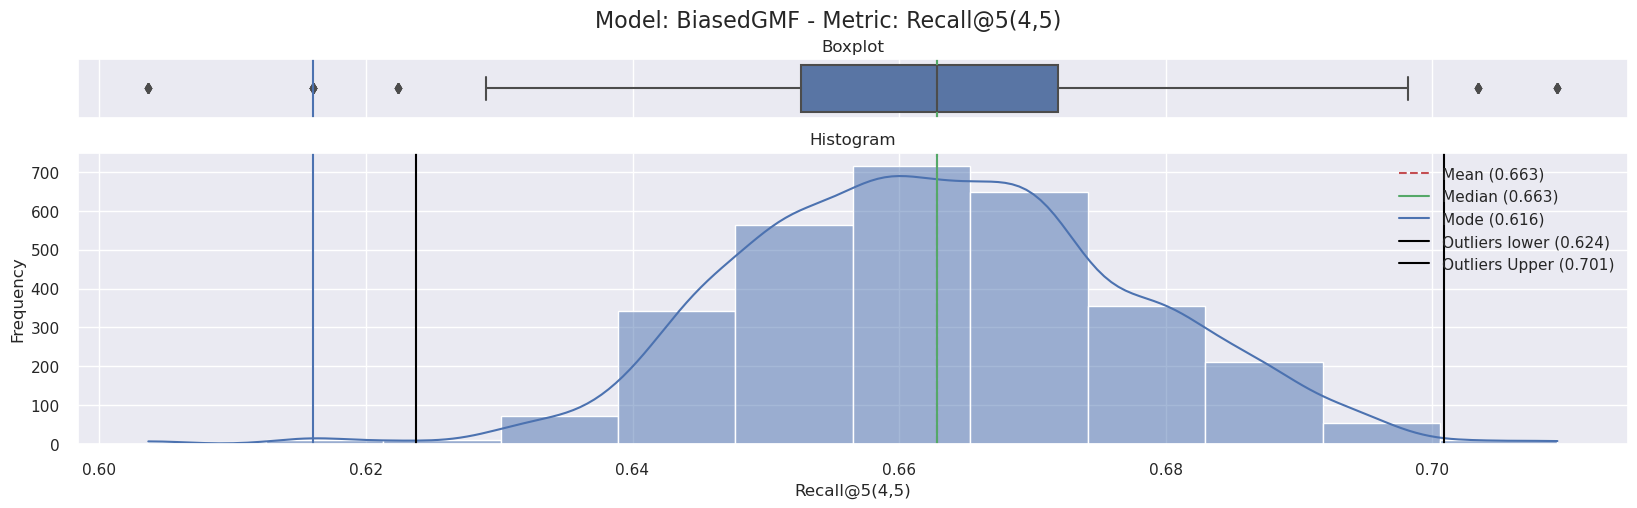

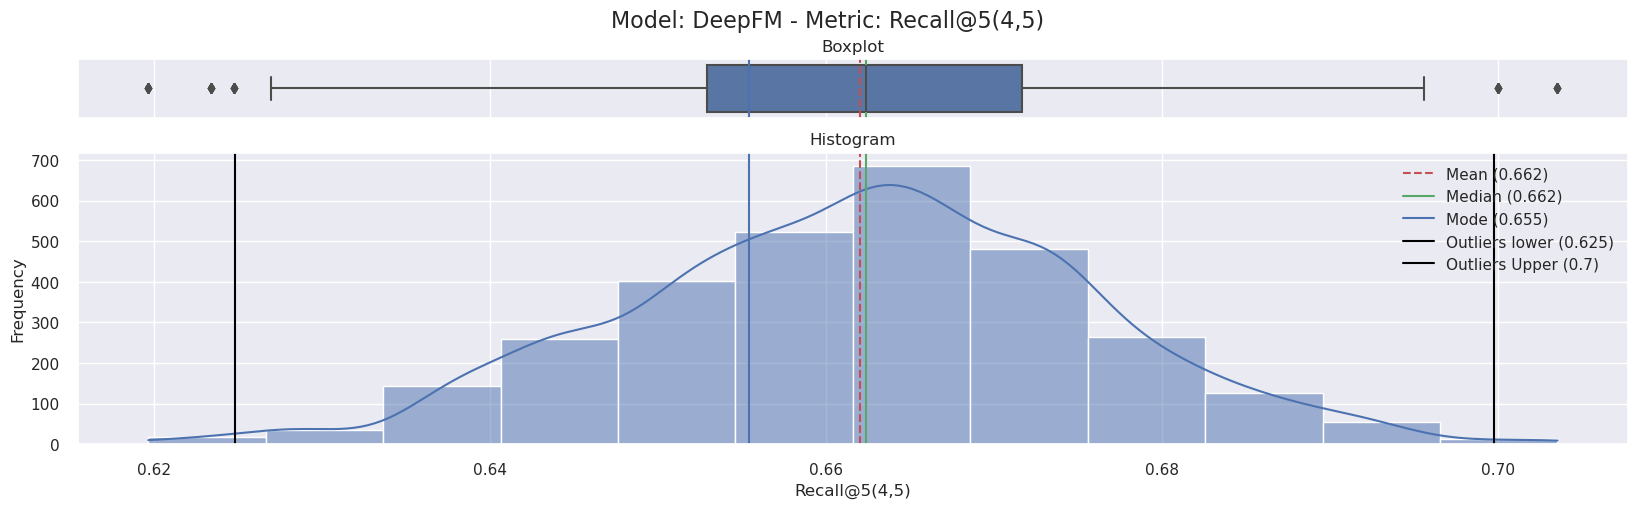

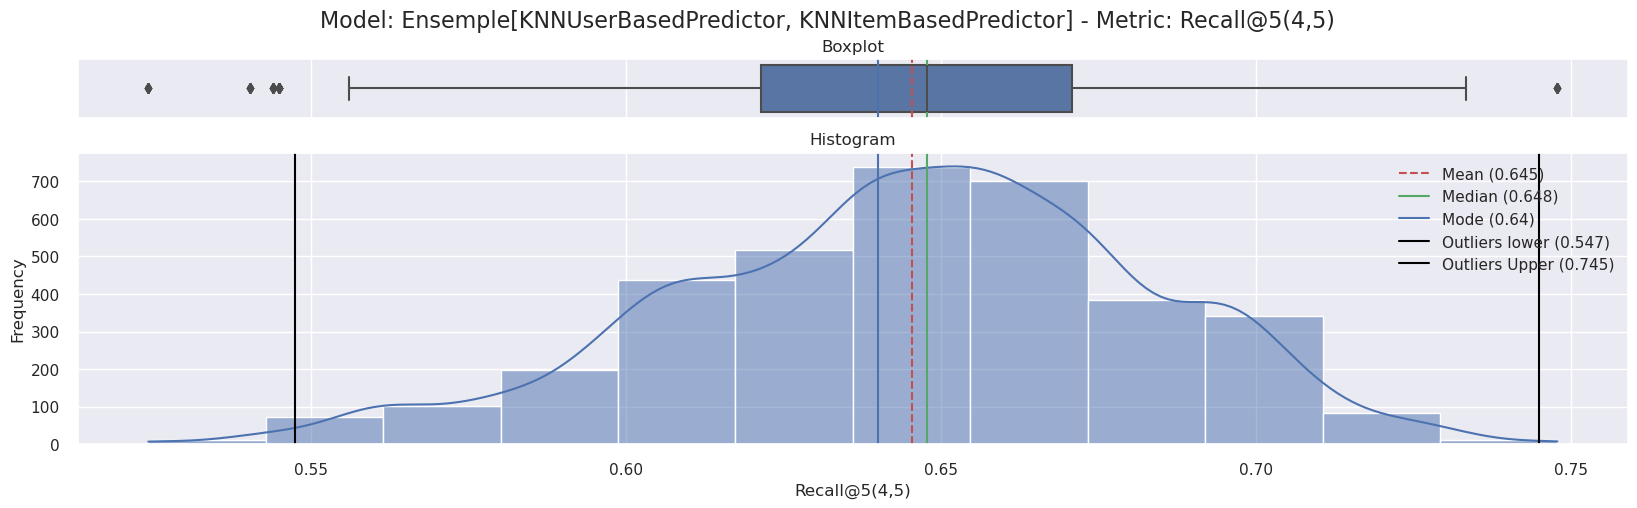

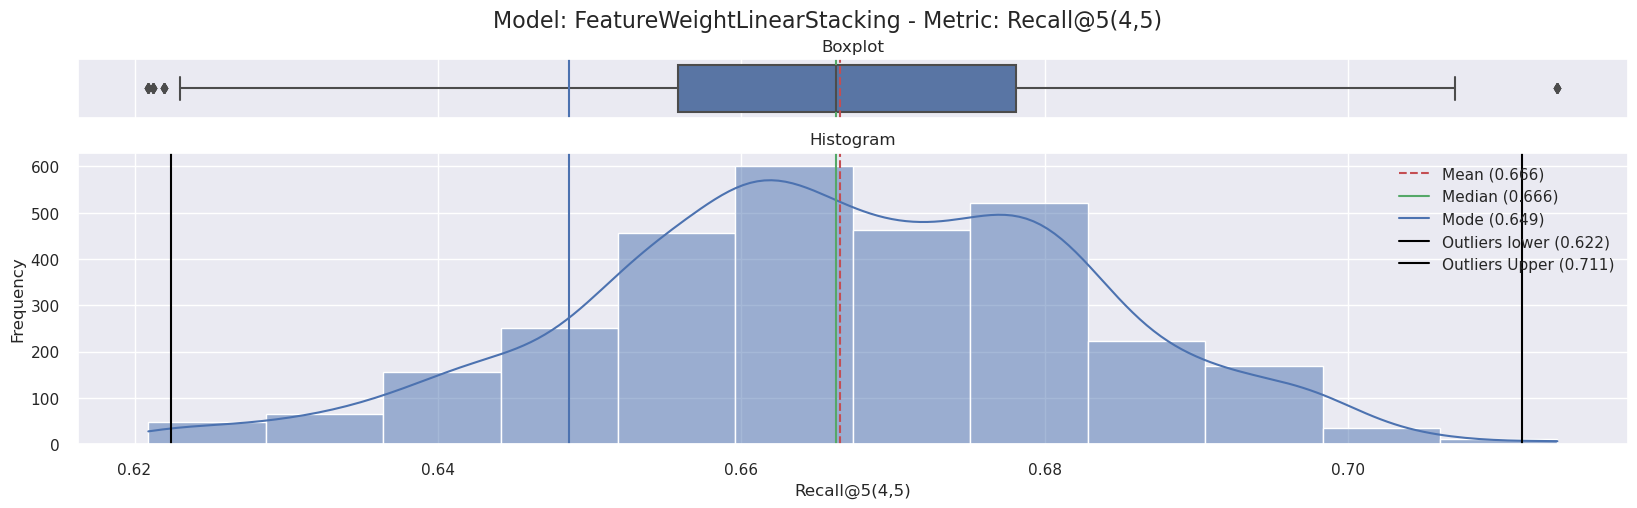

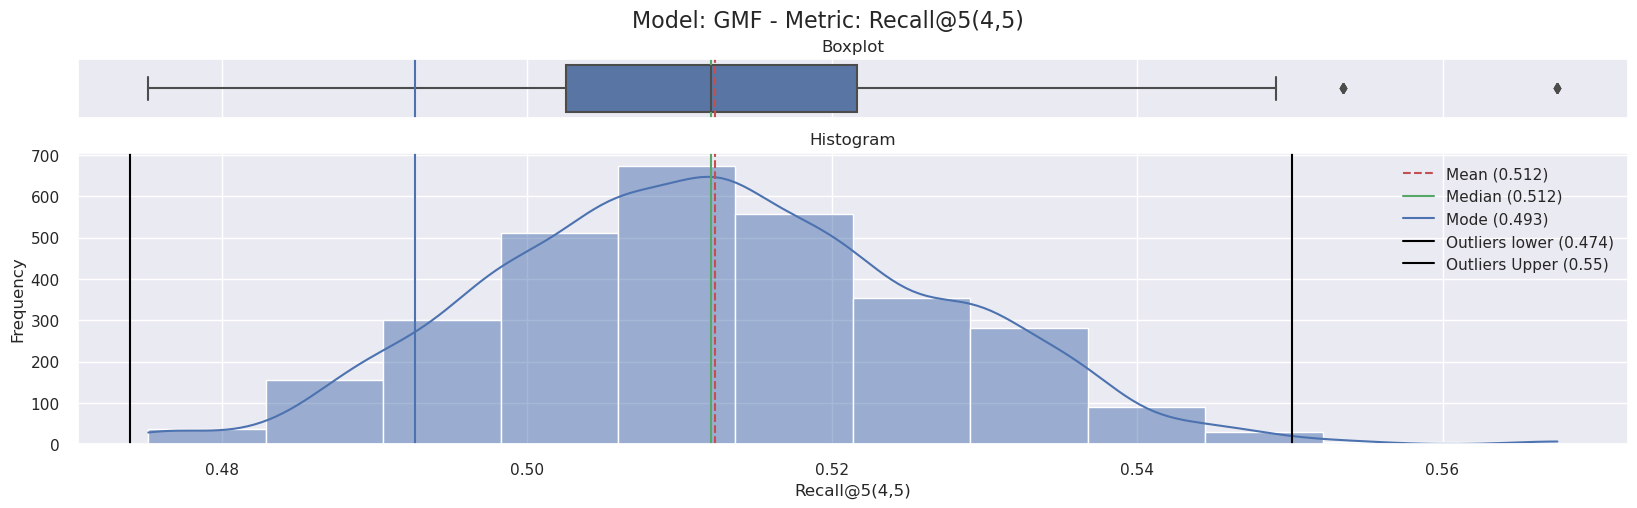

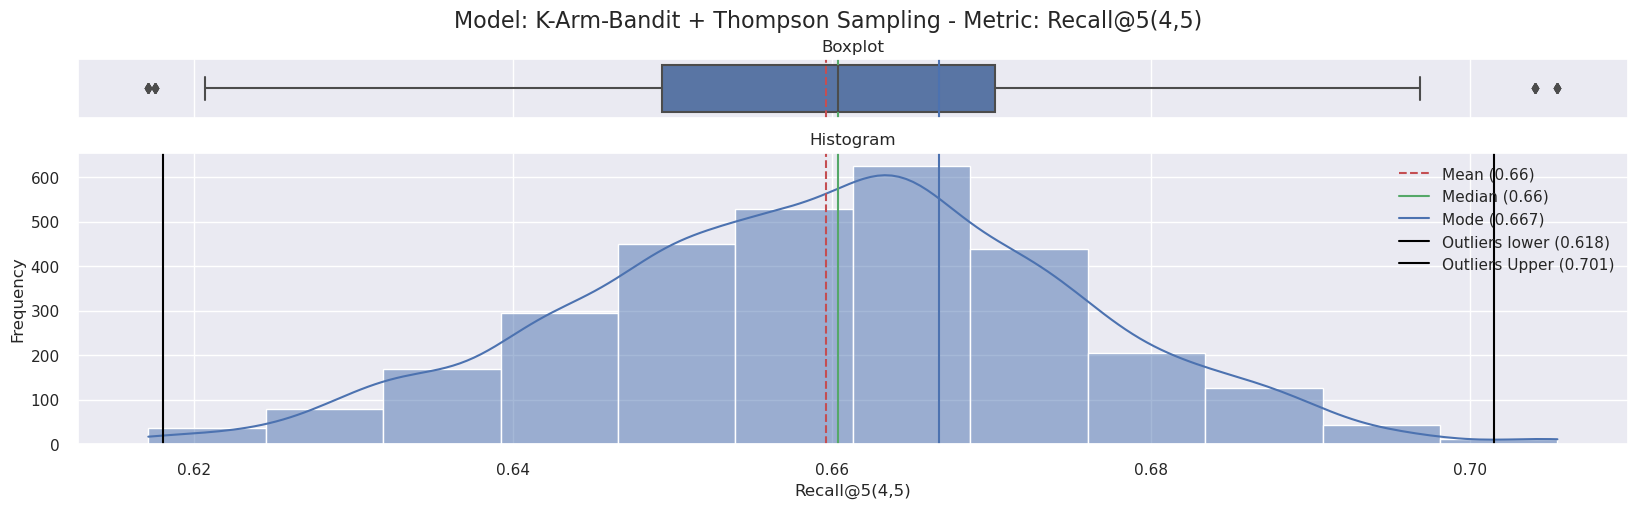

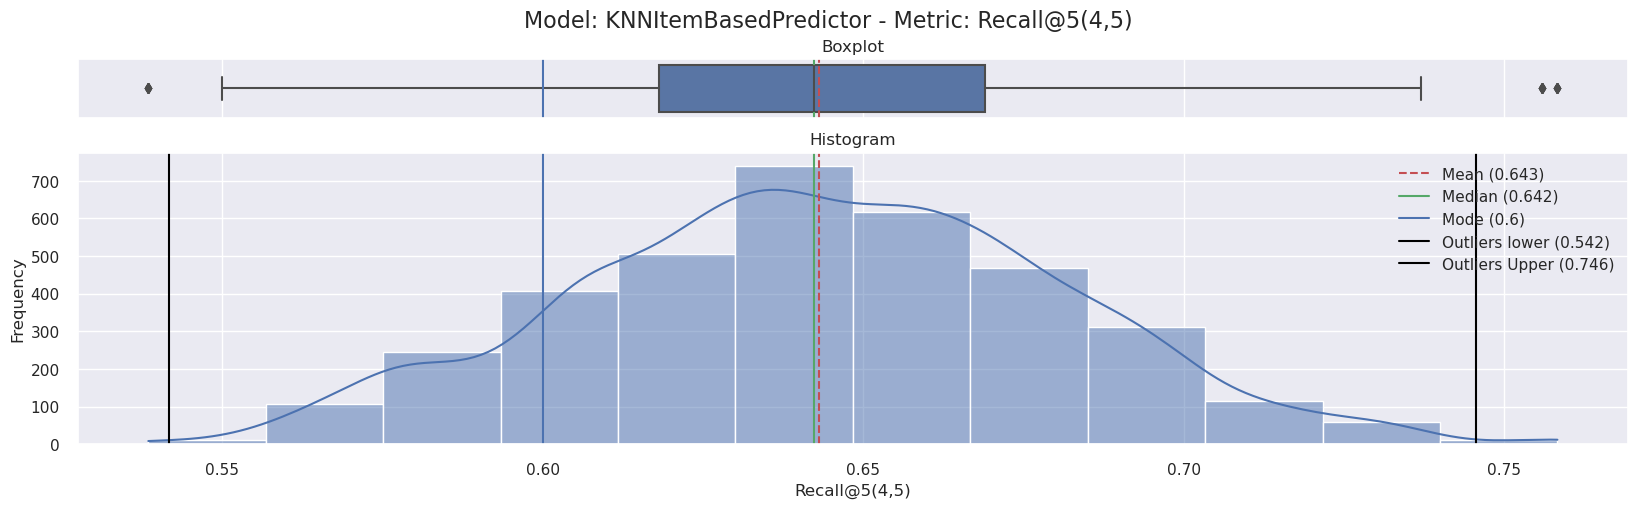

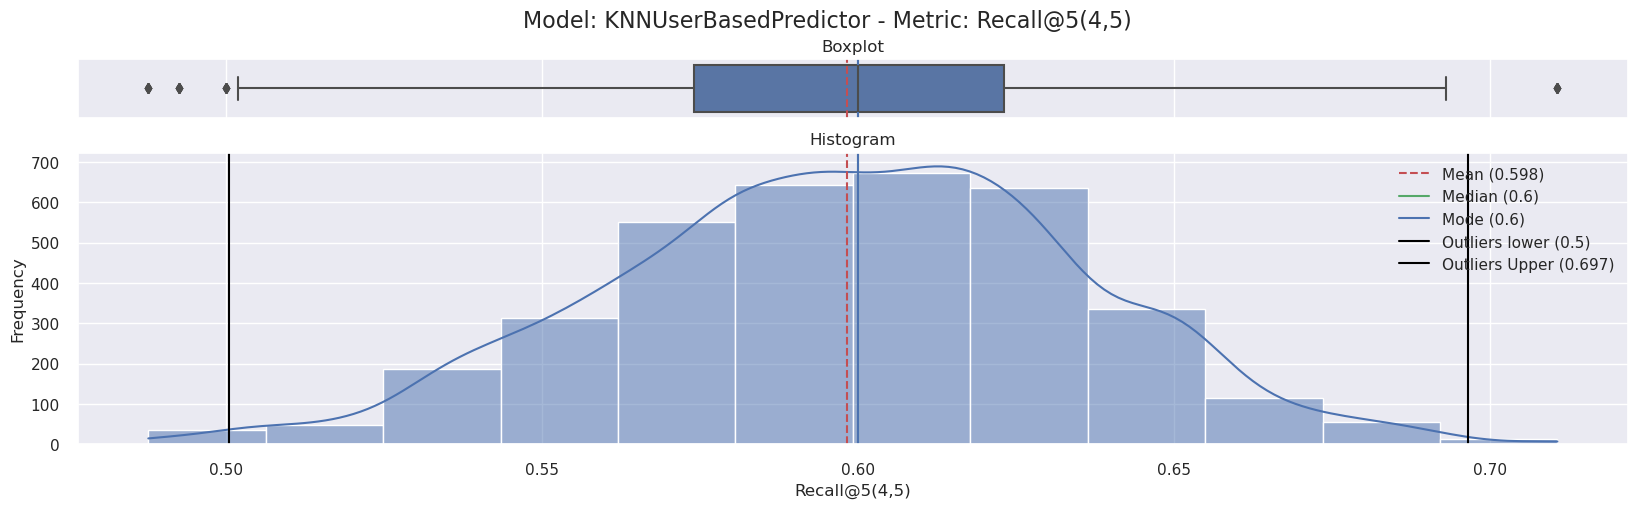

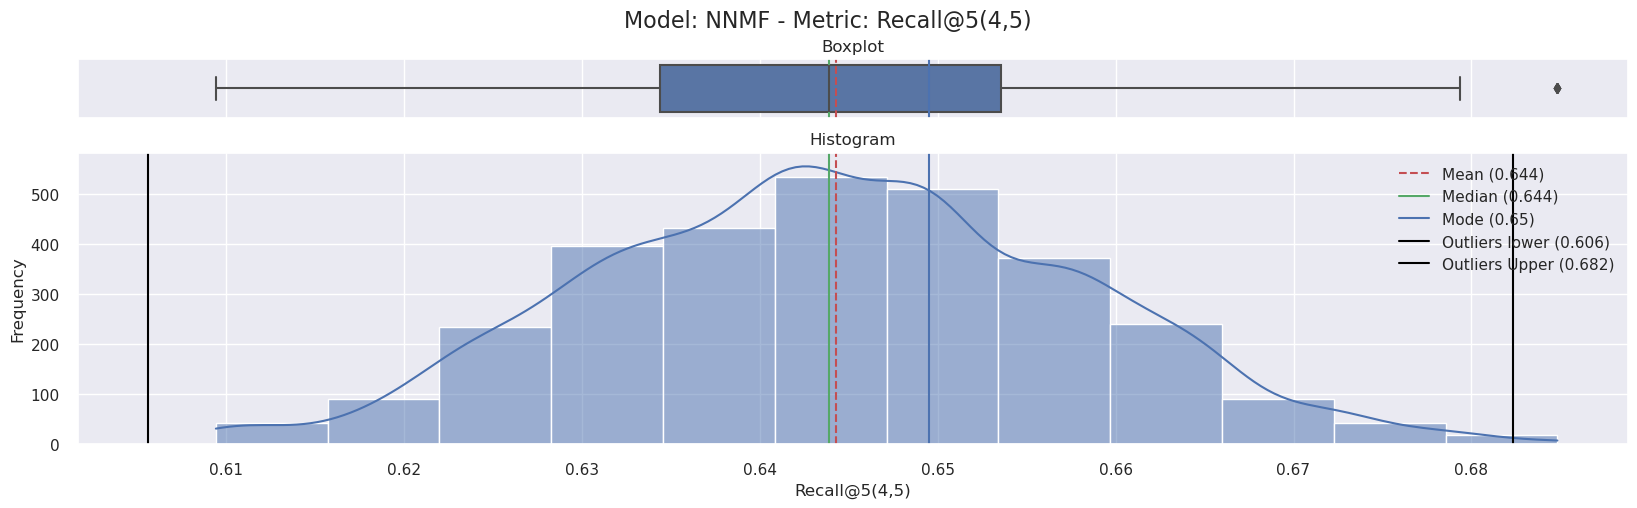

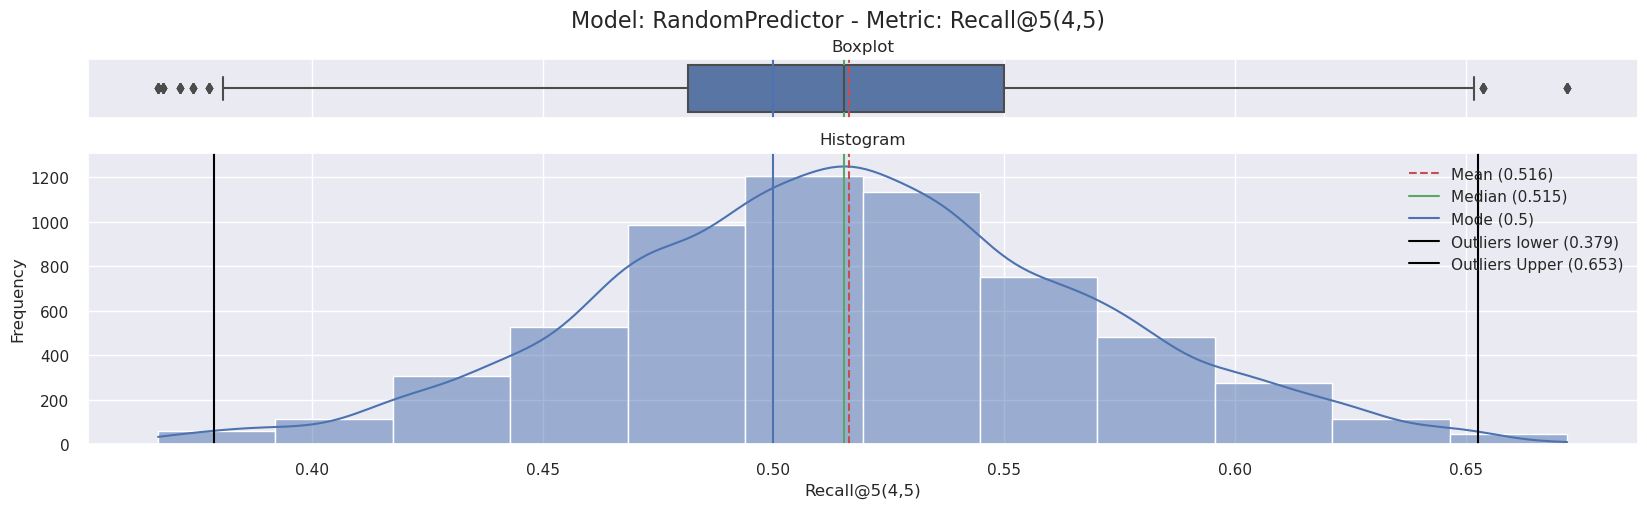

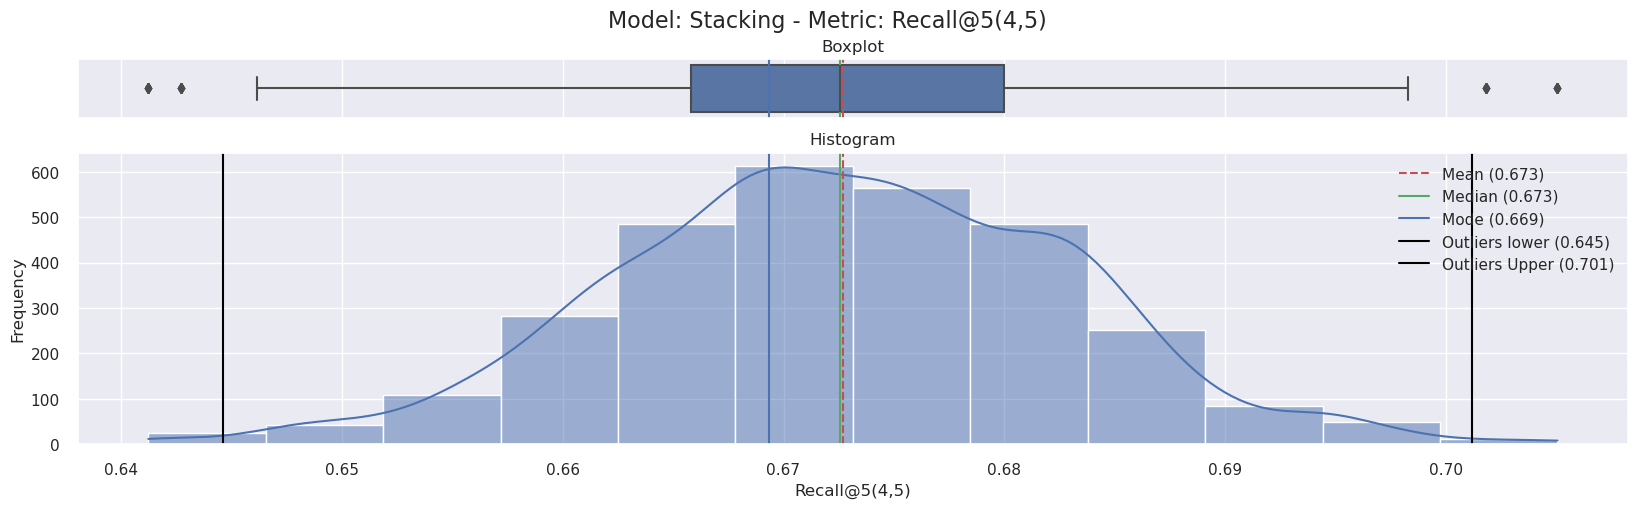

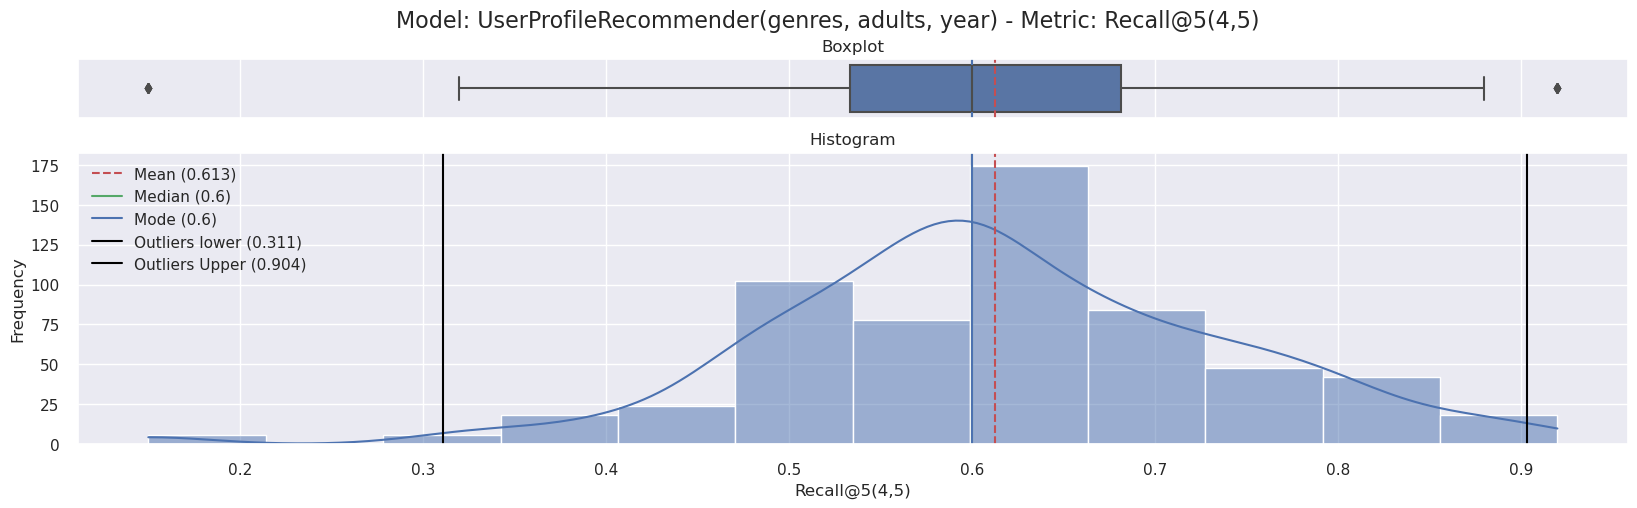

In [11]:
summary.plot(bins=12)